# 폭풍우 및 눈 폭풍 발생 시 판매 제품 양 예측(Walmart)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/merge_train.csv",low_memory=False)

In [ ]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2012-01-01,1,2,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,1,3,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
3,2012-01-01,1,4,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
4,2012-01-01,1,5,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617596,2014-10-31,45,108,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617597,2014-10-31,45,109,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617598,2014-10-31,45,110,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/data/walmart_test.csv",low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 23 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   date         object
 1   store_nbr    int64 
 2   item_nbr     int64 
 3   units        int64 
 4   station_nbr  int64 
 5   tmax         object
 6   tmin         object
 7   tavg         object
 8   depart       object
 9   dewpoint     object
 10  wetbulb      object
 11  heat         object
 12  cool         object
 13  sunrise      object
 14  sunset       object
 15  codesum      object
 16  snowfall     object
 17  preciptotal  object
 18  stnpressure  object
 19  sealevel     object
 20  resultspeed  object
 21  resultdir    object
 22  avgspeed     object
dtypes: int64(4), object(19)
memory usage: 810.3+ MB


In [ ]:
# 문자열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])

print(df)
print(df['date'].dtype)

              date  store_nbr  item_nbr  units  station_nbr tmax tmin tavg  \
0       2012-01-01          1         1      0            1   52   31   42   
1       2012-01-01          1         2      0            1   52   31   42   
2       2012-01-01          1         3      0            1   52   31   42   
3       2012-01-01          1         4      0            1   52   31   42   
4       2012-01-01          1         5      0            1   52   31   42   
...            ...        ...       ...    ...          ...  ...  ...  ...   
4617595 2014-10-31         45       107      0           16   53   34   44   
4617596 2014-10-31         45       108      0           16   53   34   44   
4617597 2014-10-31         45       109      0           16   53   34   44   
4617598 2014-10-31         45       110      0           16   53   34   44   
4617599 2014-10-31         45       111      0           16   53   34   44   

        depart dewpoint  ... sunrise sunset     codesum snowfal

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526917 entries, 0 to 526916
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       526917 non-null  object
 1   store_nbr  526917 non-null  int64 
 2   item_nbr   526917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 12.1+ MB


In [ ]:
# 문자열을 datetime 객체로 변환
df1['date'] = pd.to_datetime(df['date'])

print(df1)
print(df1['date'].dtype)

             date  store_nbr  item_nbr
0      2012-01-01          2         1
1      2012-01-01          2         2
2      2012-01-01          2         3
3      2012-01-01          2         4
4      2012-01-01          2         5
...           ...        ...       ...
526912 2012-07-17         45       107
526913 2012-07-17         45       108
526914 2012-07-17         45       109
526915 2012-07-17         45       110
526916 2012-07-17         45       111

[526917 rows x 3 columns]
datetime64[ns]


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526917 entries, 0 to 526916
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       526917 non-null  datetime64[ns]
 1   store_nbr  526917 non-null  int64         
 2   item_nbr   526917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 12.1 MB


In [ ]:
# df와 df1의 공통 열을 기준으로 merge하여 일치하는 행을 찾음
merged_df = pd.merge(df, df1, on=['date', 'store_nbr', 'item_nbr'], how='left', indicator=True)

# 일치하지 않는 행만 남김
df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# 결과 출력
print(df)

              date  store_nbr  item_nbr  units  station_nbr tmax tmin tavg  \
0       2012-01-01          1         1      0            1   52   31   42   
1       2012-01-01          1         2      0            1   52   31   42   
2       2012-01-01          1         3      0            1   52   31   42   
3       2012-01-01          1         4      0            1   52   31   42   
4       2012-01-01          1         5      0            1   52   31   42   
...            ...        ...       ...    ...          ...  ...  ...  ...   
4635910 2014-10-31         45       107      0           16   53   34   44   
4635911 2014-10-31         45       108      0           16   53   34   44   
4635912 2014-10-31         45       109      0           16   53   34   44   
4635913 2014-10-31         45       110      0           16   53   34   44   
4635914 2014-10-31         45       111      0           16   53   34   44   

        depart dewpoint  ... sunrise sunset     codesum snowfal

* station_nbr: 기상 관측소의 고유 번호. 각 관측소를 식별하는 데 사용됩니다.
*date: 관측 날짜. 연도-월-일 형식(YYYY-MM-DD)으로 표시됩니다.
* tmax: 최고 기온. 해당 날짜 동안 관측된 최고 기온(섭씨 또는 화씨)입니다.
* tmin: 최저 기온. 해당 날짜 동안 관측된 최저 기온(섭씨 또는 화씨)입니다.
* tavg: 평균 기온. 해당 날짜 동안의 평균 기온입니다. tmax와 tmin의 평균이거나 직접 관측된 값일 수 있습니다.
* depart: 평년 대비 기온 편차. 해당 날짜의 평균 기온과 평년 평균 기온 간의 차이입니다.
* dewpoint: 대기중의 습도
* wetbulb: 습구 온도. 습구 온도계로 측정된 온도로, 공기의 온도와 습도를 동시에 반영합니다.
* heat: 난방도. 해당 날짜의 기온이 특정 기준 이하일 때 난방이 필요하다는 지표입니다.
* cool: 냉방도. 해당 날짜의 기온이 특정 기준 이상일 때 냉방이 필요하다는 지표입니다.
* sunrise: 일출 시간. 관측소 위치에서의 일출 시간입니다.
* sunset: 일몰 시간. 관측소 위치에서의 일몰 시간입니다.
* codesum: 날씨 코드 요약. 해당 날짜 동안 관측된 다양한 날씨 현상(예: 비, 눈, 안개 등)을 코드 형식으로 요약한 것.
* snowfall: 강설량. 해당 날짜 동안 관측된 눈의 양입니다.
* preciptotal: 총 강수량. 해당 날짜 동안 관측된 비나 눈 등 모든 형태의 강수량의 총합입니다.
* stnpressure: 관측소 기압. 해당 관측소에서 측정된 기압입니다.
* sealevel: 해수면 기압. 해수면을 기준으로 측정된 기압입니다.
* resultspeed: 평균 풍속. 해당 날짜 하루 동안의 평균 풍속입니다.
* resultdir: 주된 풍향. 해당 날짜 동안 관측된 주요 바람의 방향입니다.
* avgspeed: 평균 풍속. 해당 날짜에 관측한 순간의 바람의 평균 속도입니다.

In [ ]:
#데이터 전처리
#df['store_nbr'] = df['store_nbr'].astype('category')  # 카테고리 형식으로 변환
#df['station_nbr'] = df['station_nbr'].astype('category')  # 카테고리 형식으로 변환
#df['item_nbr'] = df['item_nbr'].astype('category')  # 카테고리 형식으로 변환
#df['units'] = df['units'].astype('int64')  # 정수 형식으로 변환

In [ ]:
import numpy as np

# 'T'를 0으로 변환
df['preciptotal'] = df['preciptotal'].replace('T', '0')
df.replace('M', np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4156284 entries, 0 to 4635914
Data columns (total 23 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         object        
 6   tmin         object        
 7   tavg         object        
 8   depart       object        
 9   dewpoint     object        
 10  wetbulb      object        
 11  heat         object        
 12  cool         object        
 13  sunrise      object        
 14  sunset       object        
 15  codesum      object        
 16  snowfall     object        
 17  preciptotal  object        
 18  stnpressure  object        
 19  sealevel     object        
 20  resultspeed  object        
 21  resultdir    object        
 22  avgspeed     object        
dtypes: datetime64[ns](1), int64(4), object(18)
memory usage: 761.0

snowfall(강설량)에서의 M은 Missing이라서 결측치로 처리하면 되지만, preciptotal(강수량)의 T는 수치로 나타낼 수는 없지만 강수량이 있었다는 의미. 결측치로 처리하기 보다는 0으로 만드는게 정확성을 위해서 더 나을 것 같다고 판단함.

In [ ]:
df['tmax'] = pd.to_numeric(df['tmax'], errors='coerce')
df['tmin'] = pd.to_numeric(df['tmin'], errors='coerce')
df['tavg'] = pd.to_numeric(df['tavg'], errors='coerce')
df['depart'] = pd.to_numeric(df['depart'], errors='coerce')
df['dewpoint'] = pd.to_numeric(df['dewpoint'], errors='coerce')
df['wetbulb'] = pd.to_numeric(df['wetbulb'], errors='coerce')
df['heat'] = pd.to_numeric(df['heat'], errors='coerce')
df['cool'] = pd.to_numeric(df['cool'], errors='coerce')
# codesum은 문자열이므로 변환하지 않음
df['snowfall'] = pd.to_numeric(df['snowfall'], errors='coerce')
df['preciptotal'] = pd.to_numeric(df['preciptotal'], errors='coerce')
df['stnpressure'] = pd.to_numeric(df['stnpressure'], errors='coerce')
df['sealevel'] = pd.to_numeric(df['sealevel'], errors='coerce')
df['resultspeed'] = pd.to_numeric(df['resultspeed'], errors='coerce')
df['resultdir'] = pd.to_numeric(df['resultdir'], errors='coerce')
df['avgspeed'] = pd.to_numeric(df['avgspeed'], errors='coerce')
#데이터 전처리
df['store_nbr'] = pd.to_numeric(df['store_nbr'], errors='coerce')
df['station_nbr'] = pd.to_numeric(df['station_nbr'], errors='coerce')
df['item_nbr'] = pd.to_numeric(df['item_nbr'], errors='coerce')
df['units'] = pd.to_numeric(df['units'], errors='coerce')

In [ ]:
# 화씨를 섭씨로 변환하는 함수
def fahrenheit_to_celsius(f):
    return (f - 32) * 5.0/9.0

# tmax, tmin, tavg 컬럼을 화씨에서 섭씨로 변환
df['tmax'] = df['tmax'].apply(fahrenheit_to_celsius)
df['tmin'] = df['tmin'].apply(fahrenheit_to_celsius)
df['tavg'] = df['tavg'].apply(fahrenheit_to_celsius)


미국에서의 기온 단위는 화씨라서 보는 내가 분석하기 편하게 섭씨로 바꿔줌.

In [ ]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,1,11.111111,-0.555556,5.555556,NaN,36.0,...,-,-,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20.0,4.6
1,2012-01-01,1,2,0,1,11.111111,-0.555556,5.555556,NaN,36.0,...,-,-,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20.0,4.6
2,2012-01-01,1,3,0,1,11.111111,-0.555556,5.555556,NaN,36.0,...,-,-,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20.0,4.6
3,2012-01-01,1,4,0,1,11.111111,-0.555556,5.555556,NaN,36.0,...,-,-,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20.0,4.6
4,2012-01-01,1,5,0,1,11.111111,-0.555556,5.555556,NaN,36.0,...,-,-,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635910,2014-10-31,45,107,0,16,11.666667,1.111111,6.666667,NaN,35.0,...,-,-,,NaN,0.00,29.90,29.99,4.5,3.0,5.3
4635911,2014-10-31,45,108,0,16,11.666667,1.111111,6.666667,NaN,35.0,...,-,-,,NaN,0.00,29.90,29.99,4.5,3.0,5.3
4635912,2014-10-31,45,109,0,16,11.666667,1.111111,6.666667,NaN,35.0,...,-,-,,NaN,0.00,29.90,29.99,4.5,3.0,5.3
4635913,2014-10-31,45,110,0,16,11.666667,1.111111,6.666667,NaN,35.0,...,-,-,,NaN,0.00,29.90,29.99,4.5,3.0,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4156284 entries, 0 to 4635914
Data columns (total 23 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         float64       
 6   tmin         float64       
 7   tavg         float64       
 8   depart       float64       
 9   dewpoint     float64       
 10  wetbulb      float64       
 11  heat         float64       
 12  cool         float64       
 13  sunrise      object        
 14  sunset       object        
 15  codesum      object        
 16  snowfall     float64       
 17  preciptotal  float64       
 18  stnpressure  float64       
 19  sealevel     float64       
 20  resultspeed  float64       
 21  resultdir    float64       
 22  avgspeed     float64       
dtypes: datetime64[ns](1), float64(15), int64(4), object(3)
memory 

In [ ]:
df.describe()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,4156284,4.156284e+06,4.156284e+06,4.156284e+06,4.156284e+06,4.045728e+06,4.045839e+06,3.974466e+06,1.347984e+06,4.069149e+06,3.995778e+06,3.974466e+06,3.974466e+06,2.564877e+06,3.550113e+06,4.048281e+06,3.953043e+06,4.084245e+06,4.084245e+06,4.055940e+06
mean,2013-05-13 06:53:25.042196992,2.324525e+01,5.600000e+01,9.830074e-01,1.136163e+01,2.223431e+01,9.870382e+00,1.615321e+01,1.707757e+00,4.583963e+01,5.305309e+01,9.711389e+00,5.787159e+00,1.572251e-02,8.190257e-02,2.871975e+01,3.001445e+01,6.384376e+00,1.836018e+01,8.014776e+00
min,2012-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-2.388889e+01,-2.944444e+01,-2.666667e+01,-3.200000e+01,-2.400000e+01,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.372000e+01,2.916000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,2012-08-29 00:00:00,1.200000e+01,2.800000e+01,0.000000e+00,7.000000e+00,1.555556e+01,1.666667e+00,8.888889e+00,-3.000000e+00,3.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.874000e+01,2.989000e+01,3.200000e+00,1.300000e+01,5.200000e+00
50%,2013-04-24 00:00:00,2.400000e+01,5.600000e+01,0.000000e+00,1.200000e+01,2.388889e+01,1.111111e+01,1.777778e+01,2.000000e+00,4.900000e+01,5.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.933000e+01,3.000000e+01,5.500000e+00,1.800000e+01,7.300000e+00
75%,2014-01-27 00:00:00,3.400000e+01,8.400000e+01,0.000000e+00,1.600000e+01,3.055556e+01,1.888889e+01,2.500000e+01,6.000000e+00,6.300000e+01,6.800000e+01,1.700000e+01,1.200000e+01,0.000000e+00,1.000000e-02,2.978000e+01,3.013000e+01,8.800000e+00,2.500000e+01,1.010000e+01
max,2014-10-31 00:00:00,4.500000e+01,1.110000e+02,5.568000e+03,2.000000e+01,4.555556e+01,3.111111e+01,3.777778e+01,3.200000e+01,7.700000e+01,8.000000e+01,8.100000e+01,3.500000e+01,1.620000e+01,7.360000e+00,3.061000e+01,3.080000e+01,2.840000e+01,3.600000e+01,2.870000e+01
std,NaN,1.290358e+01,3.204164e+01,9.883349e+00,4.939411e+00,1.067751e+01,1.058537e+01,1.041187e+01,7.705915e+00,1.938025e+01,1.674415e+01,1.336881e+01,7.753141e+00,2.752243e-01,2.877280e-01,1.832995e+00,1.904477e-01,4.213992e+00,9.684121e+00,3.931614e+00


In [ ]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')


삭제할 칼럼:codesum, depart, avgspeed, sealevel, resultdir, sunrise, sunset

In [ ]:
df = df[['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax','tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'resultspeed']]

In [ ]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,resultspeed
0,2012-01-01,1,1,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
1,2012-01-01,1,2,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
2,2012-01-01,1,3,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
3,2012-01-01,1,4,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
4,2012-01-01,1,5,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635910,2014-10-31,45,107,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635911,2014-10-31,45,108,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635912,2014-10-31,45,109,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635913,2014-10-31,45,110,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5


## EDA

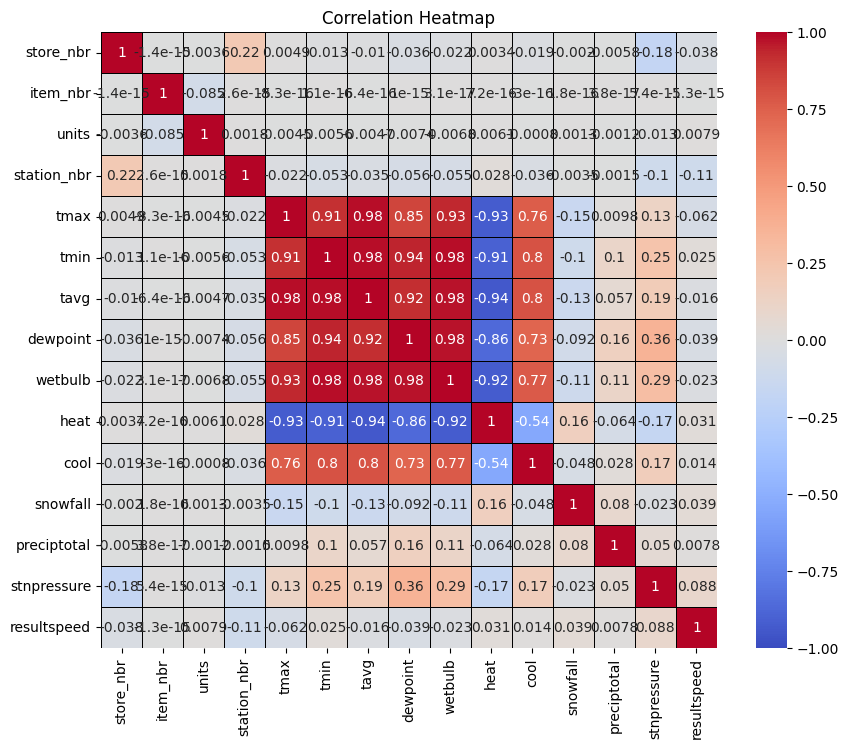

In [ ]:
#패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
corr_matrix = df.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

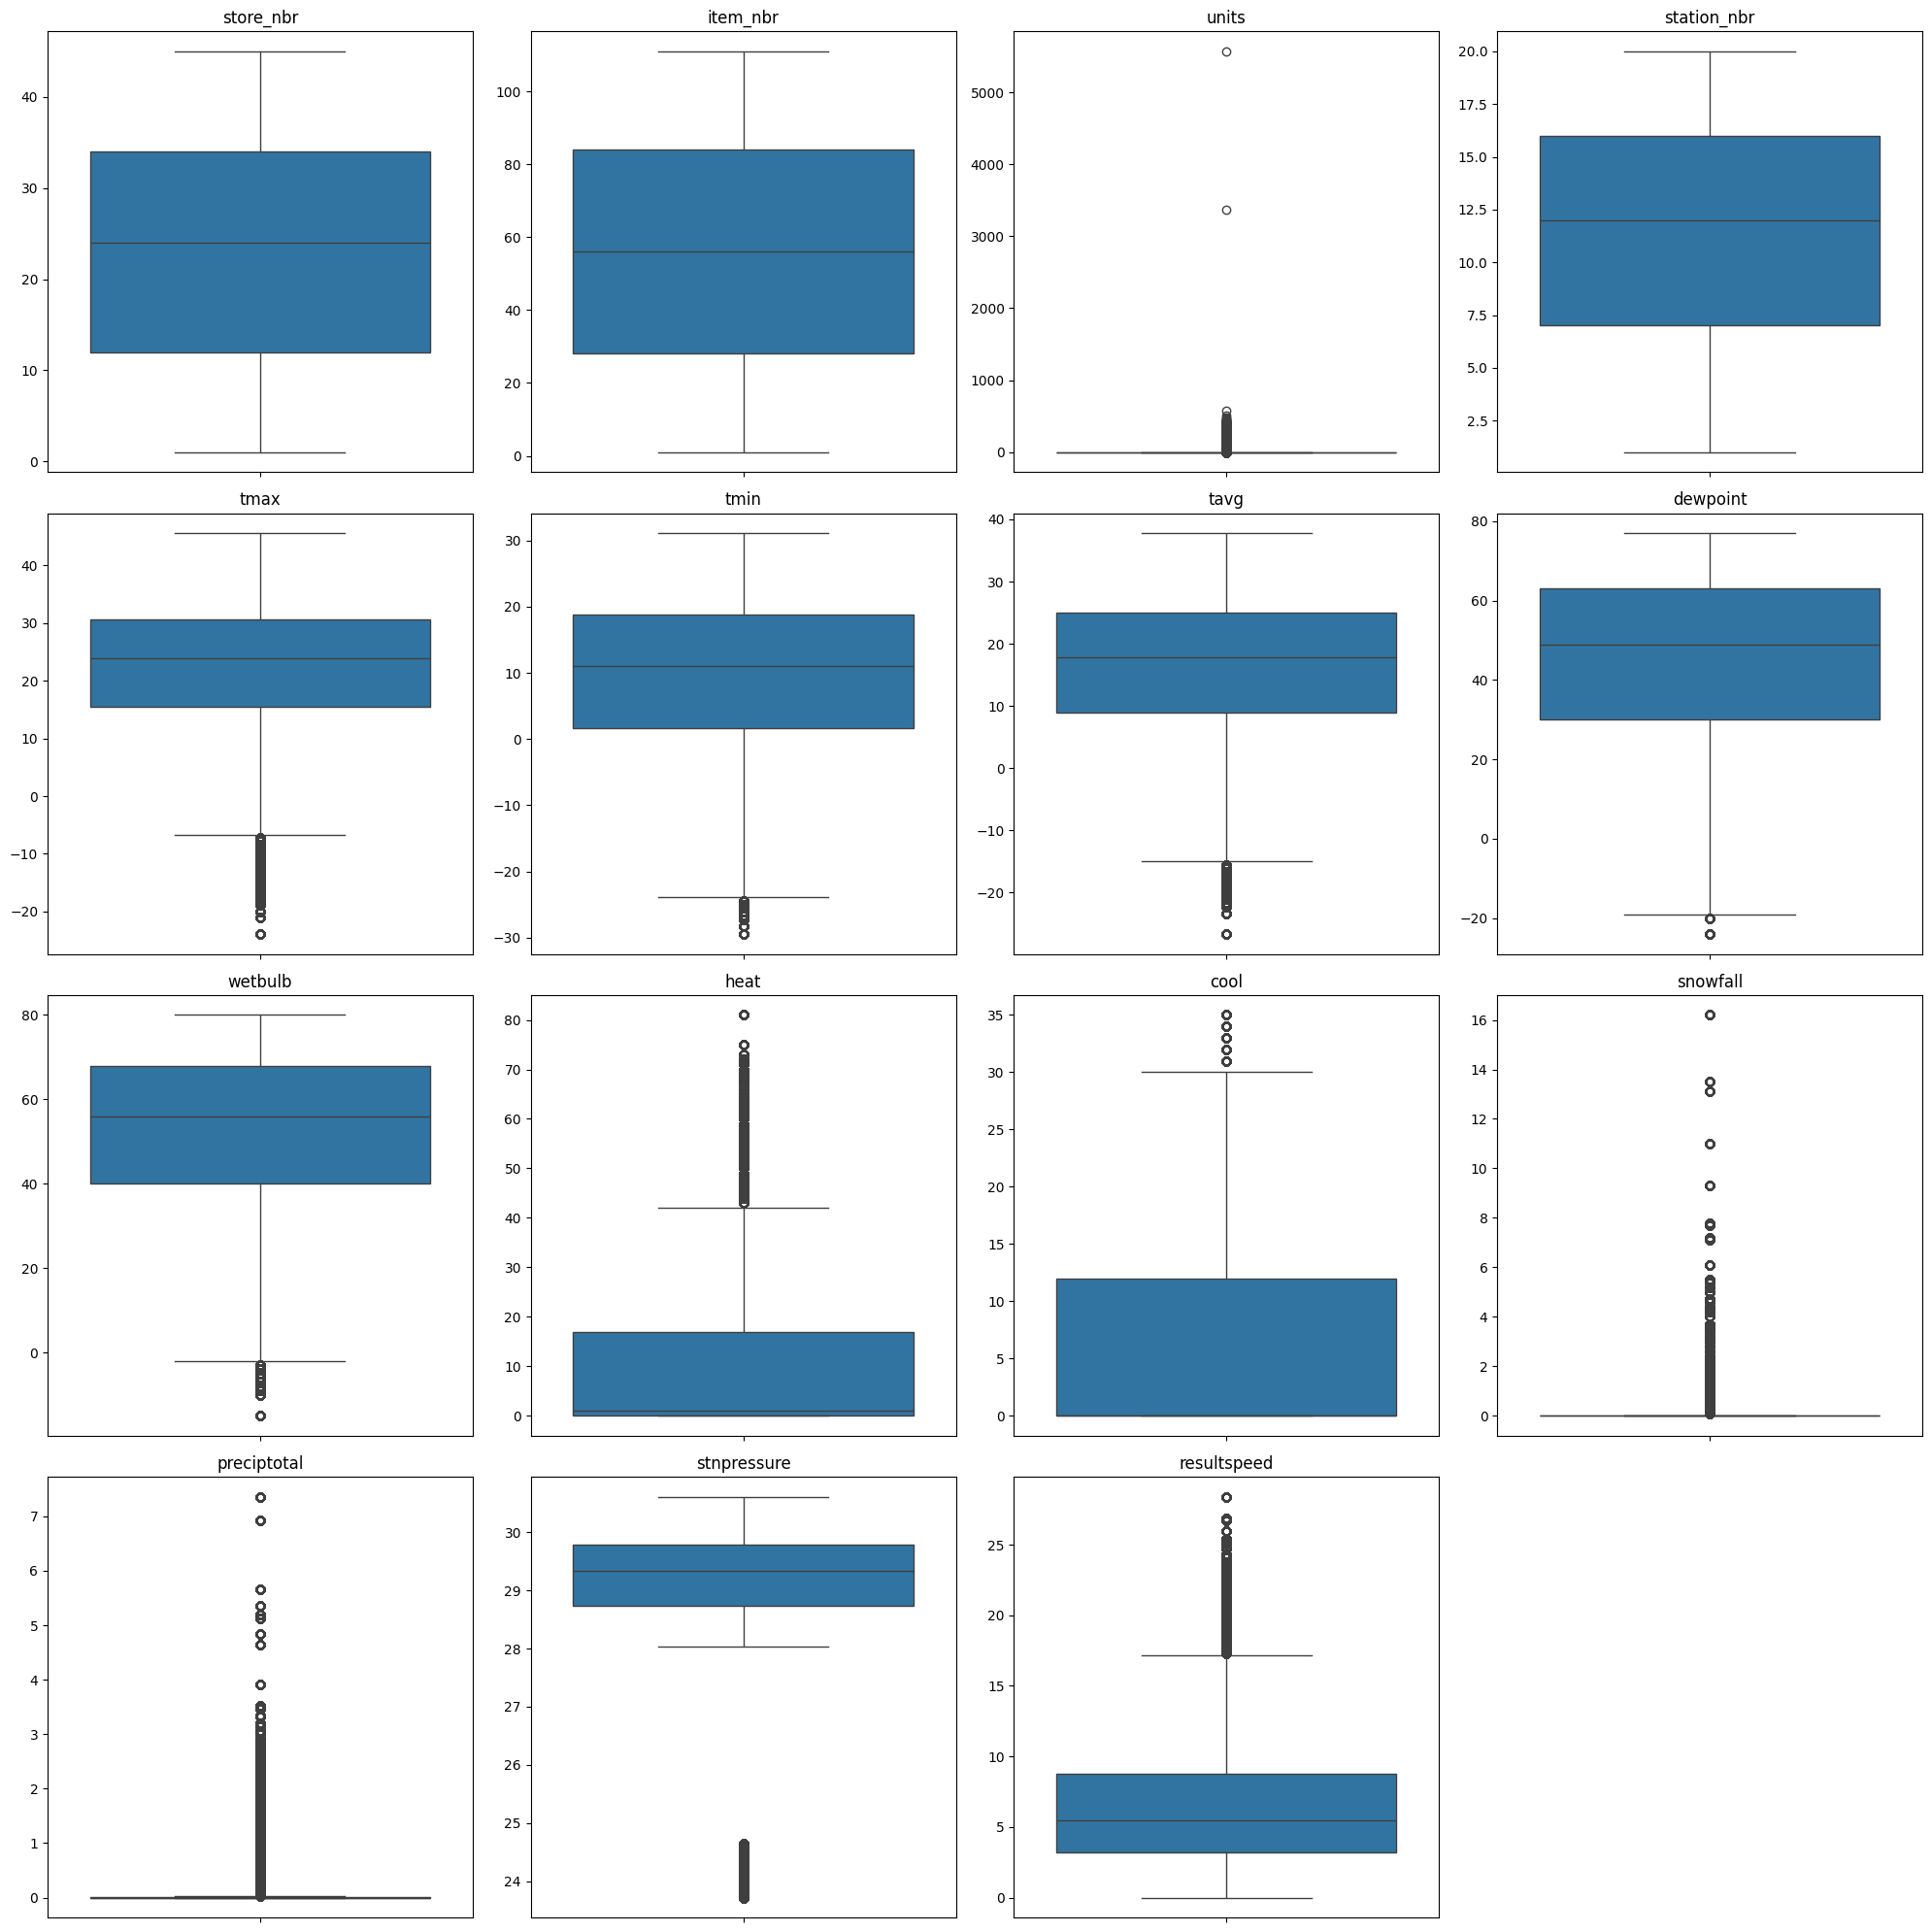

In [ ]:
continuous_columns =df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 4
num_rows = len(continuous_columns) // num_columns + (1 if len(continuous_columns) % num_columns > 0 else 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5*num_rows))

for i, column in enumerate(continuous_columns):
    row = i // num_columns
    col = i % num_columns
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

unit에서 3000이상에 하나와 5000 이상에 하나 있는게 가장 눈에 띄는 이상치로 보임,사실상 이상치가 unit이 정말 많음. 처리하는데에 하나하나 살펴봐야할 것 같고 units가 목표변수라서 더더욱 뜯어봐야할 필요성 있음.

In [ ]:
#값의 빈도 계산
value_counts = df["units"].value_counts()

In [ ]:
value_counts

units
0       4049514
1         12163
2          7976
3          4051
4          2965
         ...   
334           1
503           1
282           1
577           1
3369          1
Name: count, Length: 387, dtype: int64

In [ ]:
grouped = df.groupby(['store_nbr', 'date'])['units'].sum().reset_index()

# units의 합계가 0인 경우만 필터링
zero_units_dates = grouped[grouped['units'] == 0]

In [ ]:
grouped[grouped['units'] == 0]

,store_nbr,date,units
588,1,2013-12-25,0
1360,2,2013-12-25,0
2103,3,2013-12-25,0
3009,4,2013-12-25,0
3805,5,2013-12-25,0
5312,7,2013-12-25,0
6135,8,2013-12-25,0
7017,9,2013-12-25,0
7816,10,2013-12-25,0
9376,12,2013-12-25,0


In [ ]:
grouped

,store_nbr,date,units
0,1,2012-01-01,32
1,1,2012-01-02,66
2,1,2012-01-03,24
3,1,2012-01-04,23
4,1,2012-01-06,14
...,...,...,...
37439,45,2014-10-27,51
37440,45,2014-10-28,34
37441,45,2014-10-29,19
37442,45,2014-10-30,17


In [ ]:
zero_units_dates

,store_nbr,date,units
588,1,2013-12-25,0
1360,2,2013-12-25,0
2103,3,2013-12-25,0
3009,4,2013-12-25,0
3805,5,2013-12-25,0
5312,7,2013-12-25,0
6135,8,2013-12-25,0
7017,9,2013-12-25,0
7816,10,2013-12-25,0
9376,12,2013-12-25,0


In [ ]:
df = df[~df.set_index(['store_nbr', 'date', 'units']).index.isin(zero_units_dates.set_index(['store_nbr', 'date', 'units']).index)]

In [ ]:
df.units.value_counts()

units
0       4044297
1         12163
2          7976
3          4051
4          2965
         ...   
334           1
503           1
282           1
577           1
3369          1
Name: count, Length: 387, dtype: int64

In [ ]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,resultspeed
0,2012-01-01,1,1,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
1,2012-01-01,1,2,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
2,2012-01-01,1,3,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
3,2012-01-01,1,4,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
4,2012-01-01,1,5,0,1,11.111111,-0.555556,5.555556,36.0,40.0,23.0,0.0,NaN,0.05,29.78,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635910,2014-10-31,45,107,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635911,2014-10-31,45,108,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635912,2014-10-31,45,109,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5
4635913,2014-10-31,45,110,0,16,11.666667,1.111111,6.666667,35.0,41.0,21.0,0.0,NaN,0.00,29.90,4.5


In [ ]:
# 'units' 컬럼에서 값이 3369인 행을 조회
outlier_row = df[df['units'] == 3369]

print(outlier_row)

              date  store_nbr  item_nbr  units  station_nbr      tmax  \
3775114 2013-11-21         37         5   3369           13 -2.222222   

              tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
3775114 -11.666667 -6.666667      11.0     14.0  45.0   0.0       NaN   

         preciptotal  stnpressure  resultspeed  
3775114         0.08        24.47          7.0  


In [ ]:
# 'units' 컬럼에서 값이 5000 이상인 행을 조회
outlier_row = df[df['units'] > 5000]

print(outlier_row)

              date  store_nbr  item_nbr  units  station_nbr      tmax  \
3735820 2012-11-15         37         5   5568           13  6.666667   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
3735820 -4.444444  1.111111      26.0     31.0  31.0   0.0       NaN   

         preciptotal  stnpressure  resultspeed  
3735820          0.0        24.48          2.5  


3369개의 판매량과 5568개의 판매량은 37번 매장에서 5번 품목이 대량 구매가 된 케이스. 강설량과 강수량이 폭풍우 기준에 부합하진 않아서 회귀분석 정확성을 위해 지워주기로 판단함.

In [ ]:
# 제거할 값 리스트
values_to_remove = [3369, 5568]# 'units' 칼럼에서 특정 값들을 가진 행 제거

dfc = df[~df['units'].isin(values_to_remove)]

# 결과 출력
print("원본 데이터:\n", df)
print("\n제거 후 데이터:\n", dfc)

원본 데이터:
               date  store_nbr  item_nbr  units  station_nbr       tmax  \
0       2012-01-01          1         1      0            1  11.111111   
1       2012-01-01          1         2      0            1  11.111111   
2       2012-01-01          1         3      0            1  11.111111   
3       2012-01-01          1         4      0            1  11.111111   
4       2012-01-01          1         5      0            1  11.111111   
...            ...        ...       ...    ...          ...        ...   
4635910 2014-10-31         45       107      0           16  11.666667   
4635911 2014-10-31         45       108      0           16  11.666667   
4635912 2014-10-31         45       109      0           16  11.666667   
4635913 2014-10-31         45       110      0           16  11.666667   
4635914 2014-10-31         45       111      0           16  11.666667   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0       -0.555556  5.555556   

In [ ]:
average_value = dfc['units'].mean()

In [ ]:
print(f"'units' 칼럼의 평균값은 {average_value}입니다.")

'units' 칼럼의 평균값은 0.9820903792159361입니다.


## 판매량과 기후간의 관계성

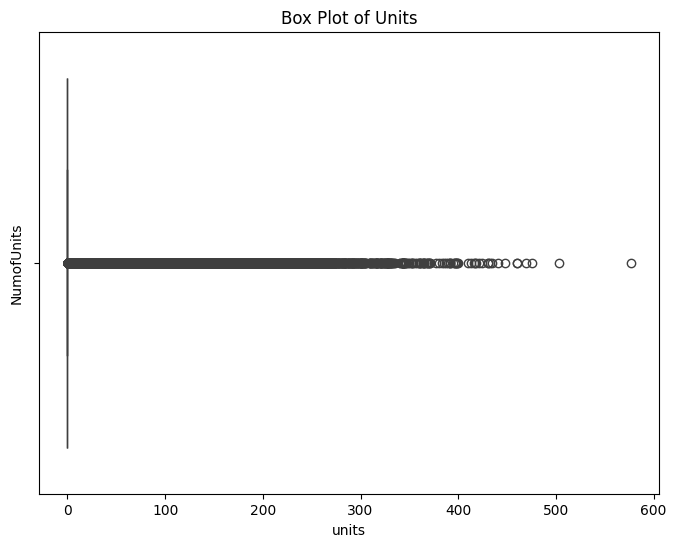

In [ ]:
# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfc["units"])
plt.title("Box Plot of Units")
plt.ylabel("NumofUnits")
plt.show()

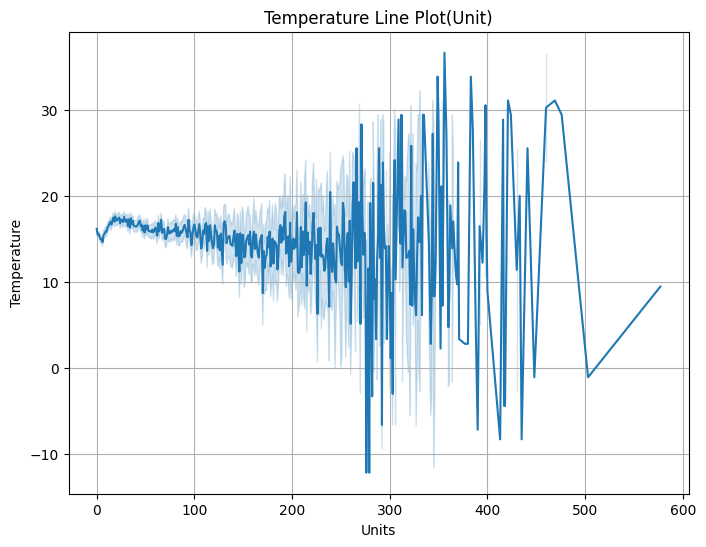

In [ ]:
#기온에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(8,6))
sns.lineplot(x=dfc["units"], y="tavg", data=dfc)
plt.title("Temperature Line Plot(Unit)")
plt.xlabel("Units")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

유난히 튀는 값을 빼고 보면 평균적으로 영하보다 영상, 30도 이상보다 10~20도 사이에 판매량이 평균인 0에서 100 사이에 몰려있는 형태를 보인다.(큰 분별점은 보이지 않음)

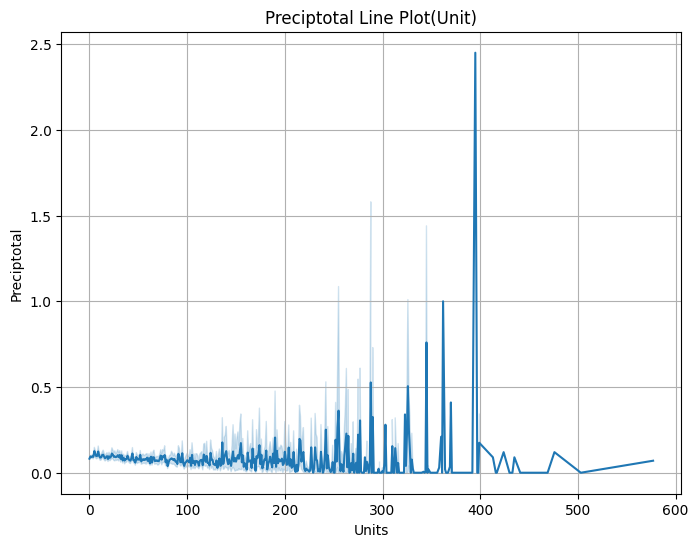

In [ ]:
#강수량에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(8,6))
sns.lineplot(x=dfc["units"], y="preciptotal", data=dfc)
plt.title("Preciptotal Line Plot(Unit)")
plt.xlabel("Units")
plt.ylabel("Preciptotal")
plt.grid(True)
plt.show()

평균적으로 강수량이 적을수록 판매량이 많아진다 단, 이상치에 해당되는 판매량이 400가까이 찍힌 것 하나는 강수가 2.5인치 가까이로 월등하게 높다. 강수량 칼럼은 강우와 강설 다 포함이 되어있으니 snowfall과 preciptotal 각각 따져볼 필요가 있음,

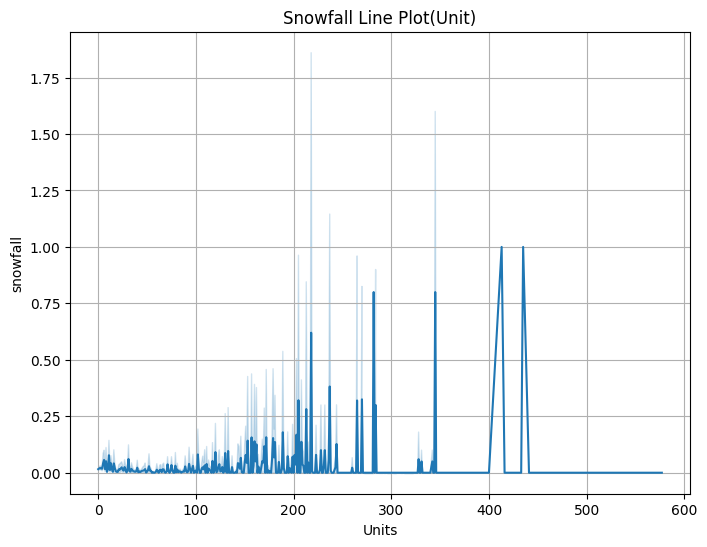

In [ ]:
#강설에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(8,6))
sns.lineplot(x=dfc["units"], y="snowfall", data=dfc)
plt.title("Snowfall Line Plot(Unit)")
plt.xlabel("Units")
plt.ylabel("snowfall")
plt.grid(True)
plt.show()

In [ ]:
# 연, 월, 일 컬럼 추가
dfc['year'] = dfc['date'].dt.year
dfc['month'] = dfc['date'].dt.month
dfc['day'] = dfc['date'].dt.day

dfc.info()

<ipython-input-42-b0b4a61bff49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['year'] = dfc['date'].dt.year
<ipython-input-42-b0b4a61bff49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['month'] = dfc['date'].dt.month


<class 'pandas.core.frame.DataFrame'>
Index: 4151065 entries, 0 to 4635914
Data columns (total 19 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         float64       
 6   tmin         float64       
 7   tavg         float64       
 8   dewpoint     float64       
 9   wetbulb      float64       
 10  heat         float64       
 11  cool         float64       
 12  snowfall     float64       
 13  preciptotal  float64       
 14  stnpressure  float64       
 15  resultspeed  float64       
 16  year         int32         
 17  month        int32         
 18  day          int32         
dtypes: datetime64[ns](1), float64(11), int32(3), int64(4)
memory usage: 585.9 MB


<ipython-input-42-b0b4a61bff49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['day'] = dfc['date'].dt.day


In [ ]:
# 계절 정의 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 계절 칼럼 추가
dfc['season'] = dfc['month'].apply(get_season)

# 결과 출력
print(dfc)

              date  store_nbr  item_nbr  units  station_nbr       tmax  \
0       2012-01-01          1         1      0            1  11.111111   
1       2012-01-01          1         2      0            1  11.111111   
2       2012-01-01          1         3      0            1  11.111111   
3       2012-01-01          1         4      0            1  11.111111   
4       2012-01-01          1         5      0            1  11.111111   
...            ...        ...       ...    ...          ...        ...   
4635910 2014-10-31         45       107      0           16  11.666667   
4635911 2014-10-31         45       108      0           16  11.666667   
4635912 2014-10-31         45       109      0           16  11.666667   
4635913 2014-10-31         45       110      0           16  11.666667   
4635914 2014-10-31         45       111      0           16  11.666667   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0       -0.555556  5.555556      36.0  

<ipython-input-43-93317d051dec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['season'] = dfc['month'].apply(get_season)


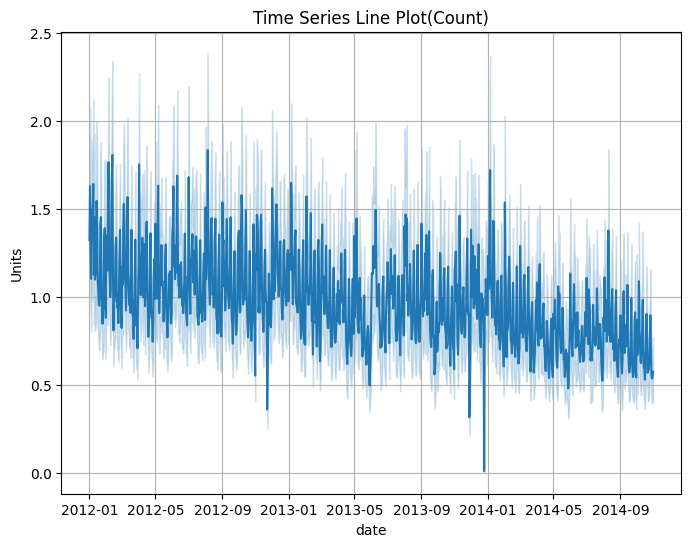

In [ ]:
#날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(8,6))
sns.lineplot(x=dfc["date"], y="units", data=dfc)
plt.title("Time Series Line Plot(Count)")
plt.xlabel("date")
plt.ylabel("Units")
plt.grid(True)
plt.show()

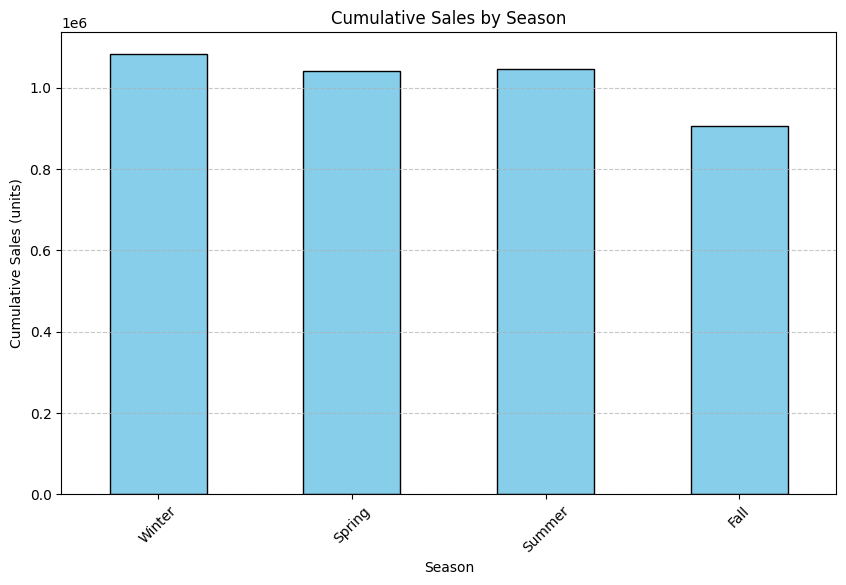

In [ ]:
# 계절별 누적 판매량 계산
seasonal_units = dfc.groupby('season')['units'].sum()

# 계절 순서를 유지하기 위해 순서 지정
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_units = seasonal_units.reindex(season_order)

# 그래프 그리기
plt.figure(figsize=(10, 6))
seasonal_units.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cumulative Sales by Season')
plt.xlabel('Season')
plt.ylabel('Cumulative Sales (units)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

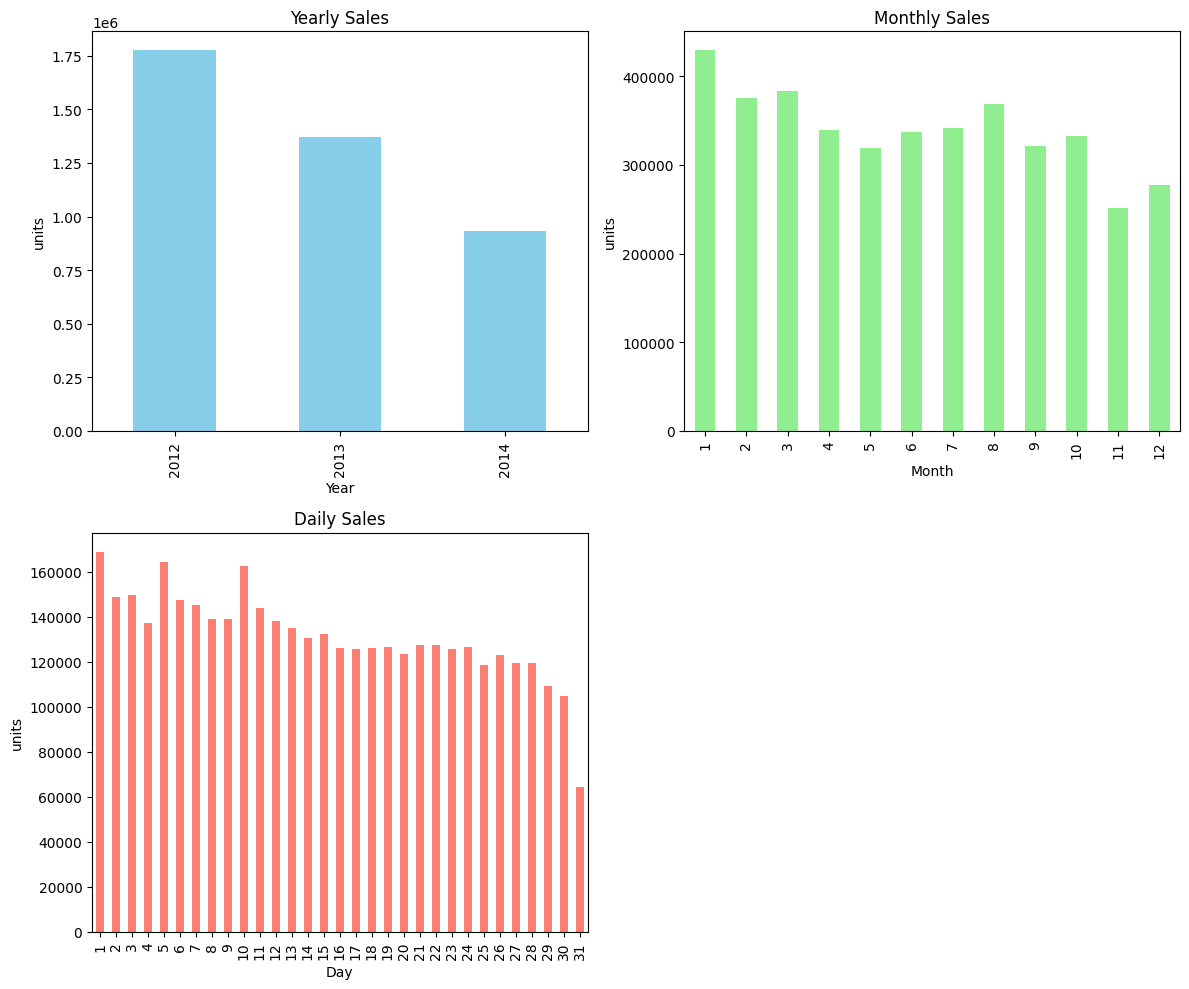

In [ ]:
# 연도별 매출액 합계
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
dfc.groupby('year')['units'].sum().plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('units')

# 월별 매출액 합계
plt.subplot(2, 2, 2)
dfc.groupby('month')['units'].sum().plot(kind='bar', color='lightgreen')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('units')

# 일별 매출액 합계
plt.subplot(2, 2, 3)
dfc.groupby('day')['units'].sum().plot(kind='bar', color='salmon')
plt.title('Daily Sales')
plt.xlabel('Day')
plt.ylabel('units')

plt.tight_layout()
plt.show()

날씨에는 벗어난 얘기지만 추가적으로 2012년 기준으로 2013년에 판매량이 줄어든 이유는 모르겠는데 2014년에 더더욱 줄어들었는 이유를 찾아보니 월마트가 2013년까지는 오프라인 매장 수를 늘리는데에 집중했다가 2014년부터 오프라인 매장과 연동된 온라인 매장을 구축해 2014년에는 오프라인 매장 면적당 매출이 급상승했다고 한다. 고로 지금 분석하고 있는 월마트 데이터는 개인적은 추측으로 오프라인으로 구매한 고객들의 데이터를 반영한 것으로 보인다.

#결측치 및 중복값 처리

In [ ]:
dfc.isnull().sum()

date                 0
store_nbr            0
item_nbr             0
units                0
station_nbr          0
tmax            110112
tmin            110001
tavg            181374
dewpoint         86913
wetbulb         160062
heat            181374
cool            181374
snowfall       1589074
preciptotal     604950
stnpressure     107559
resultspeed      71706
year                 0
month                0
day                  0
season               0
dtype: int64

In [ ]:
# tmin, tmax, tavg 열의 결측치를 backward bfill로 채우기
dfc[['tmin', 'tmax', 'tavg', 'resultspeed']] = dfc[['tmin', 'tmax', 'tavg','resultspeed']].bfill()

# 결과 출력
print(dfc.isnull().sum())

<ipython-input-48-17912d0aaeac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[['tmin', 'tmax', 'tavg', 'resultspeed']] = dfc[['tmin', 'tmax', 'tavg','resultspeed']].bfill()


date                 0
store_nbr            0
item_nbr             0
units                0
station_nbr          0
tmax                 0
tmin                 0
tavg                 0
dewpoint         86913
wetbulb         160062
heat            181374
cool            181374
snowfall       1589074
preciptotal     604950
stnpressure     107559
resultspeed          0
year                 0
month                0
day                  0
season               0
dtype: int64


기온과 관련된 칼럼의 결측치들은 모두 bfill로 대체를 시켜줬고 'resultspeed' 또한 하루 평균 풍속이기 때문에 bfill로 대체해줬다.

In [ ]:
# snowfall 칼럼의 결측치를 가진 행을 제거
dfc = dfc.dropna(subset=['snowfall'])

# 결과 출력
print(dfc.isnull().sum())
print(dfc.shape)

date                0
store_nbr           0
item_nbr            0
units               0
station_nbr         0
tmax                0
tmin                0
tavg                0
dewpoint        24642
wetbulb         41181
heat            18648
cool            18648
snowfall            0
preciptotal    251859
stnpressure      8214
resultspeed         0
year                0
month               0
day                 0
season              0
dtype: int64
(2561991, 20)


snowfall은 결측치가 전체 행 중에 상당수를 차지하기 때문에 인위적으로 다 채워버리면 보다 정확한 예측이 힘들기 때문에 아예 dropna로 날리기로 판단함.

In [ ]:
# heat와 cool 컬럼의 결측치를 최저값으로 대체
heat_min = dfc['heat'].min()
cool_min = dfc['cool'].min()

dfc['heat'].fillna(heat_min, inplace=True)
dfc['cool'].fillna(cool_min, inplace=True)

# 결과 출력
print(dfc[['heat', 'cool']].isnull().sum())
print(dfc[['heat', 'cool']].head())

heat    0
cool    0
dtype: int64
        heat  cool
103452  29.0   0.0
103453  29.0   0.0
103454  29.0   0.0
103455  29.0   0.0
103456  29.0   0.0


heat와 cool은 결측치를 최저값(최소 난방도,최소 냉방도)으로 대체하는게 데이터를 크게 왜곡하지 않고 합리적으로 채울 수 있는 방법이라 판단하여 진행했음.

In [ ]:
dfc.isnull().sum()

date                0
store_nbr           0
item_nbr            0
units               0
station_nbr         0
tmax                0
tmin                0
tavg                0
dewpoint        24642
wetbulb         41181
heat                0
cool                0
snowfall            0
preciptotal    251859
stnpressure      8214
resultspeed         0
year                0
month               0
day                 0
season              0
dtype: int64

In [ ]:
# dewpoint와 wetbulb 열의 결측치를 앞뒤값으로 채우기
dfc['dewpoint'].fillna(method='ffill', inplace=True)
dfc['dewpoint'].fillna(method='bfill', inplace=True)
dfc['wetbulb'].fillna(method='ffill', inplace=True)
dfc['wetbulb'].fillna(method='bfill', inplace=True)

# 결과 출력
print(dfc[['dewpoint', 'wetbulb']].isnull().sum())
print(dfc[['dewpoint', 'wetbulb']].head())

dewpoint    0
wetbulb     0
dtype: int64
        dewpoint  wetbulb
103452      16.0     29.0
103453      16.0     29.0
103454      16.0     29.0
103455      16.0     29.0
103456      16.0     29.0


dewpoint와 wetbulb는 앞뒤값으로 채워서 데이터 분포가 왜곡되지 않게끔 대체해줬음.

In [ ]:
dfc.isnull().sum()

date                0
store_nbr           0
item_nbr            0
units               0
station_nbr         0
tmax                0
tmin                0
tavg                0
dewpoint            0
wetbulb             0
heat                0
cool                0
snowfall            0
preciptotal    251859
stnpressure      8214
resultspeed         0
year                0
month               0
day                 0
season              0
dtype: int64

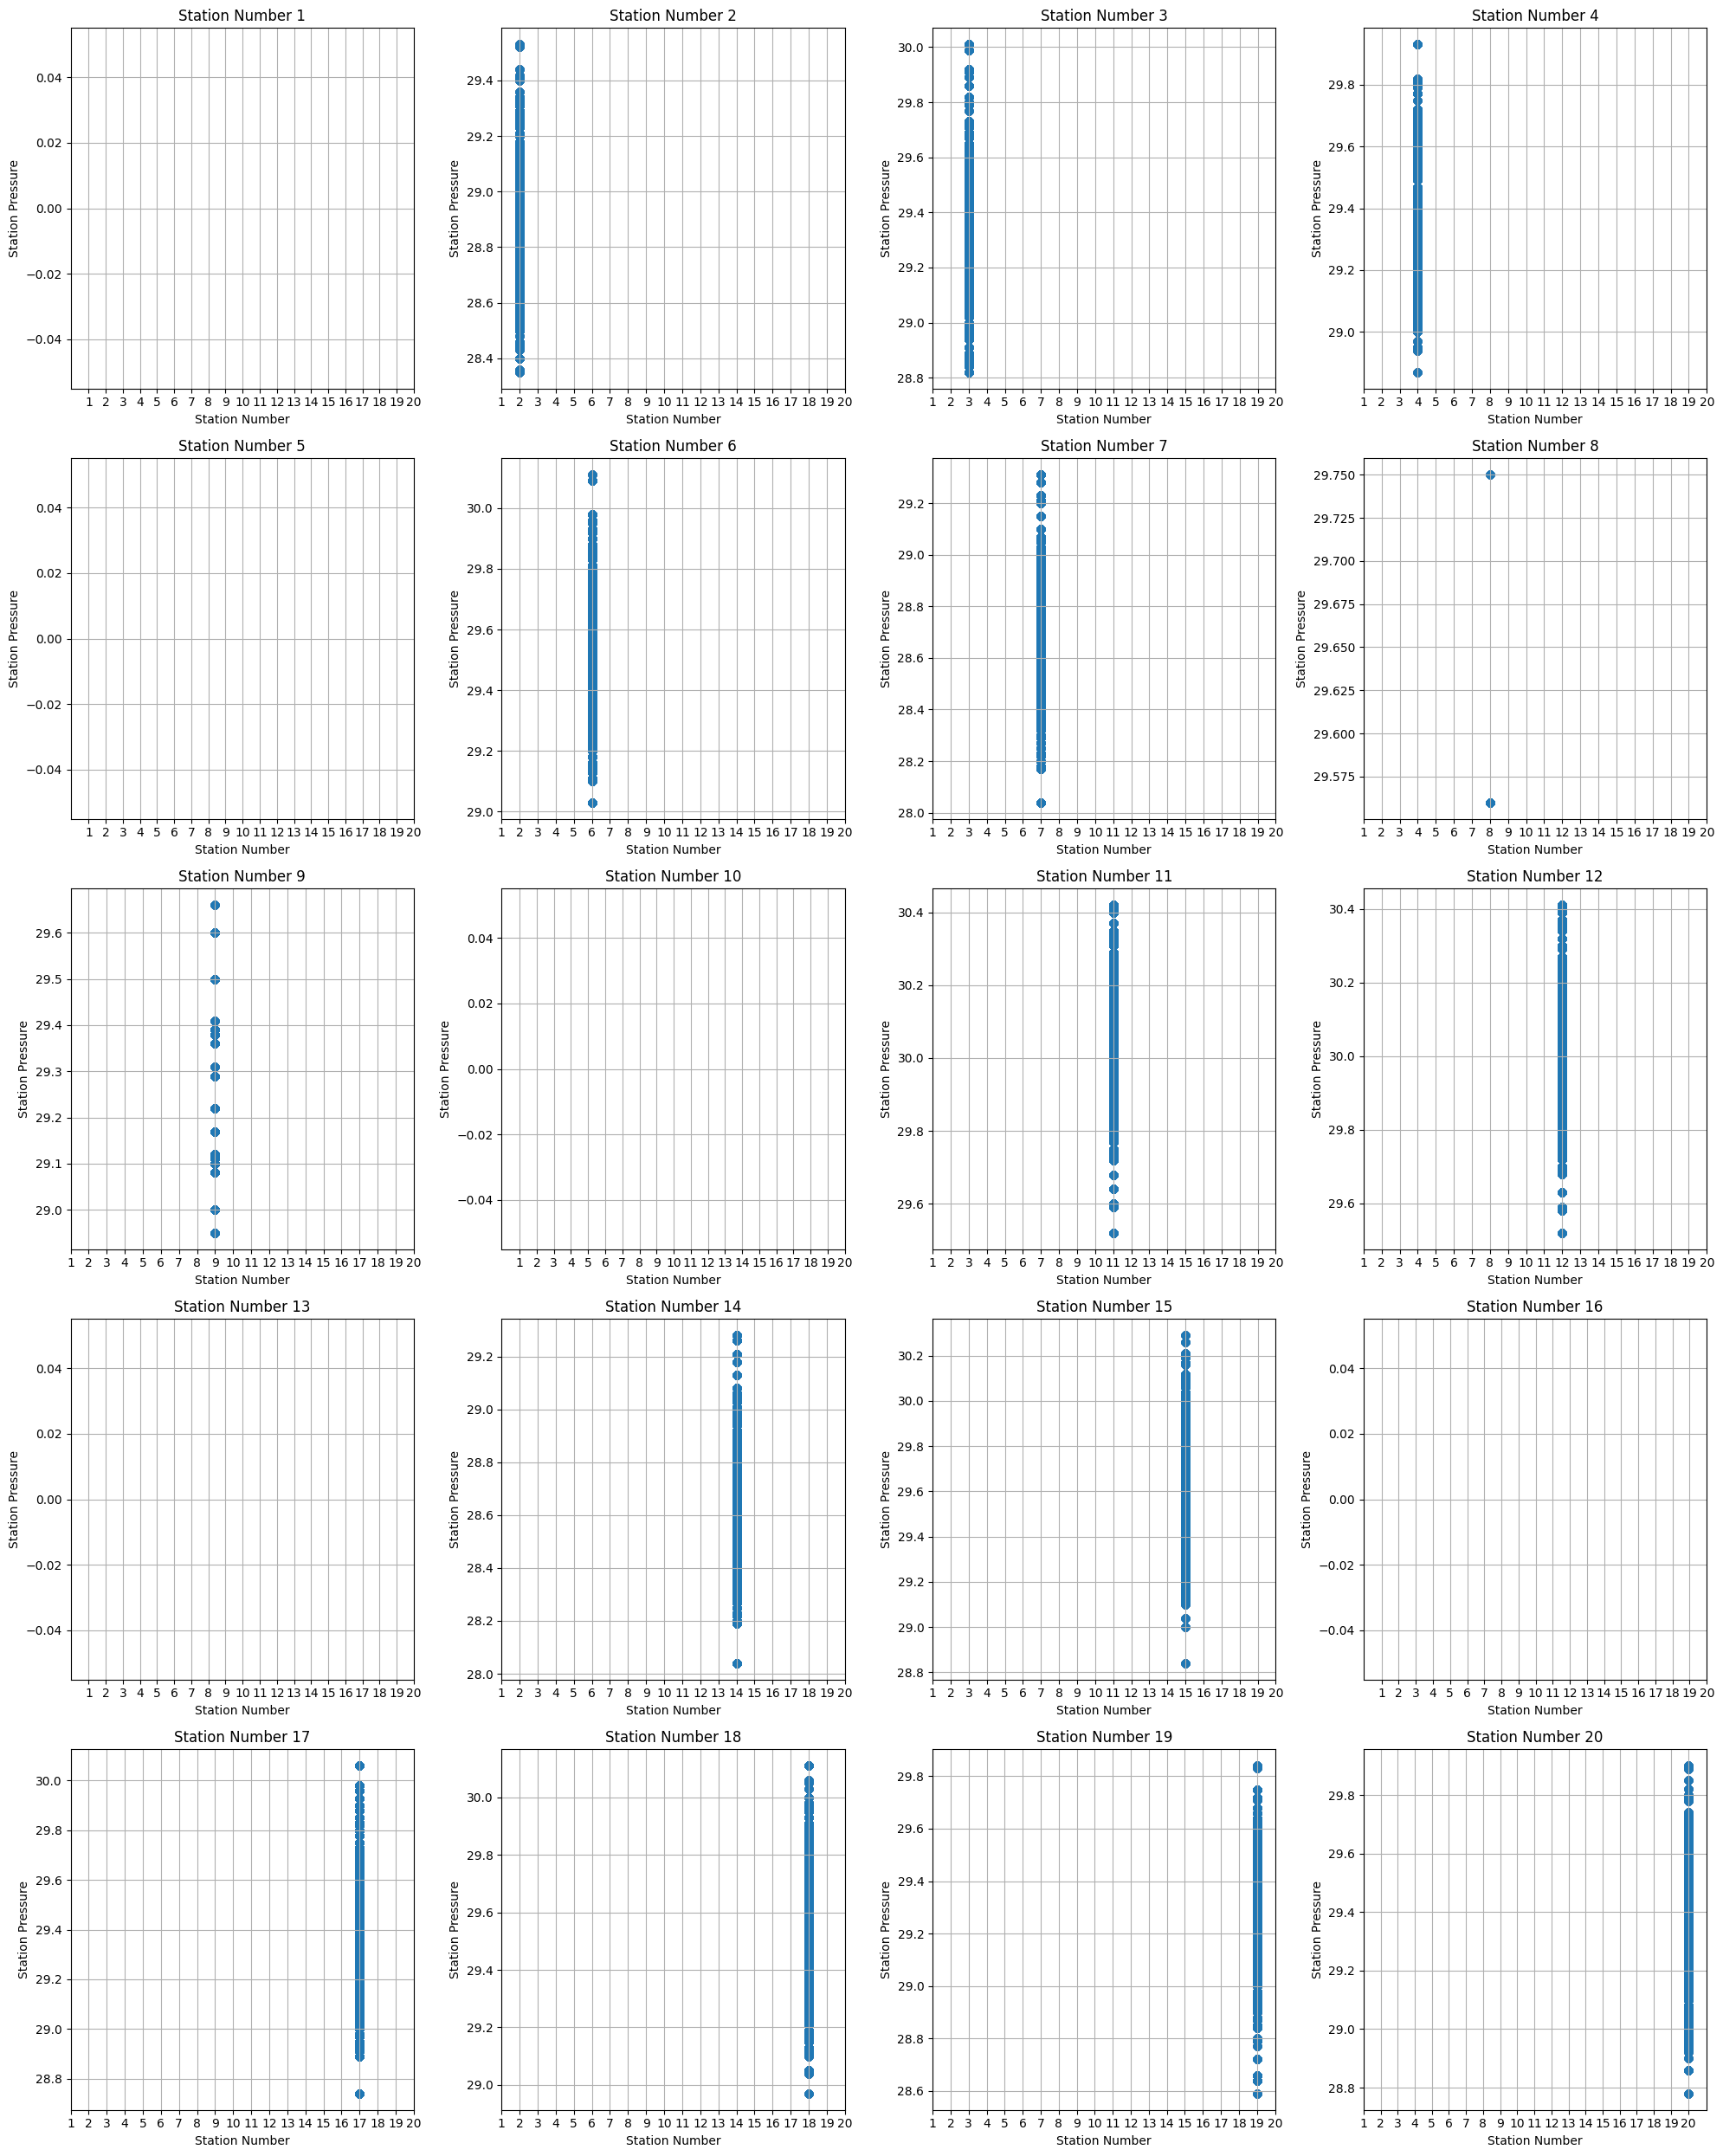

In [ ]:
# 1번부터 20번까지의 station_nbr에 대해 그래프 그리기
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
axs = axs.flatten()

for i in range(1, 21):
    station_data = dfc[dfc['station_nbr'] == i]
    axs[i-1].scatter(station_data['station_nbr'], station_data['stnpressure'], alpha=0.5)
    axs[i-1].set_title(f'Station Number {i}')
    axs[i-1].set_xlabel('Station Number')
    axs[i-1].set_ylabel('Station Pressure')
    axs[i-1].grid(True)
    axs[i-1].set_xticks(range(1, 21))  # x축에 1부터 20까지 표시

plt.tight_layout()
plt.show()

기상 관측소 기압의 결측치를 처리하기 위해서 각 관측소의 기압이 어느 정도로 측정이 되었는지 확인해보니 아예 기록이 되지 않은 곳도 여럿 있어서(띠용) 전체 관측 기록의 평균으로 채워줘도 될 것 같다는 판단이다.

In [ ]:
# 기록이 없는 관측소 번호 리스트
missing_stations = [1, 5, 10, 13, 16]

# 기록이 있는 관측소들의 평균 기압 계산
mean_pressure = dfc.loc[~dfc['station_nbr'].isin(missing_stations), 'stnpressure'].mean()

# 결측치를 평균 기압으로 대체
dfc.loc[dfc['station_nbr'].isin(missing_stations), 'stnpressure'] = mean_pressure

# 결과 출력
print(dfc)

              date  store_nbr  item_nbr  units  station_nbr       tmax  \
103452  2012-01-02          2         1      0           14   7.222222   
103453  2012-01-02          2         2      0           14   7.222222   
103454  2012-01-02          2         3      0           14   7.222222   
103455  2012-01-02          2         4      0           14   7.222222   
103456  2012-01-02          2         5    147           14   7.222222   
...            ...        ...       ...    ...          ...        ...   
4530127 2014-10-31         44       107      0           12  23.888889   
4530128 2014-10-31         44       108      0           12  23.888889   
4530129 2014-10-31         44       109      0           12  23.888889   
4530130 2014-10-31         44       110      0           12  23.888889   
4530131 2014-10-31         44       111      0           12  23.888889   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
103452   -3.333333   2.222222      16

In [ ]:
dfc.isnull().sum()

date                0
store_nbr           0
item_nbr            0
units               0
station_nbr         0
tmax                0
tmin                0
tavg                0
dewpoint            0
wetbulb             0
heat                0
cool                0
snowfall            0
preciptotal    251859
stnpressure      4884
resultspeed         0
year                0
month               0
day                 0
season              0
dtype: int64

In [ ]:
# 각 관측소(stn_nbr)별 평균값으로 결측치 채우기
dfc['stnpressure'] = dfc.groupby('station_nbr')['stnpressure'].transform(lambda x: x.fillna(x.mean()))

# 결과 출력
print(dfc['stnpressure'].isnull().sum())

0


각 관측소 별 평균으로 결측치를 채워주는게 데이터 분포를 잘 유지할 수 있을 것 같다고 생각해서 해줌.

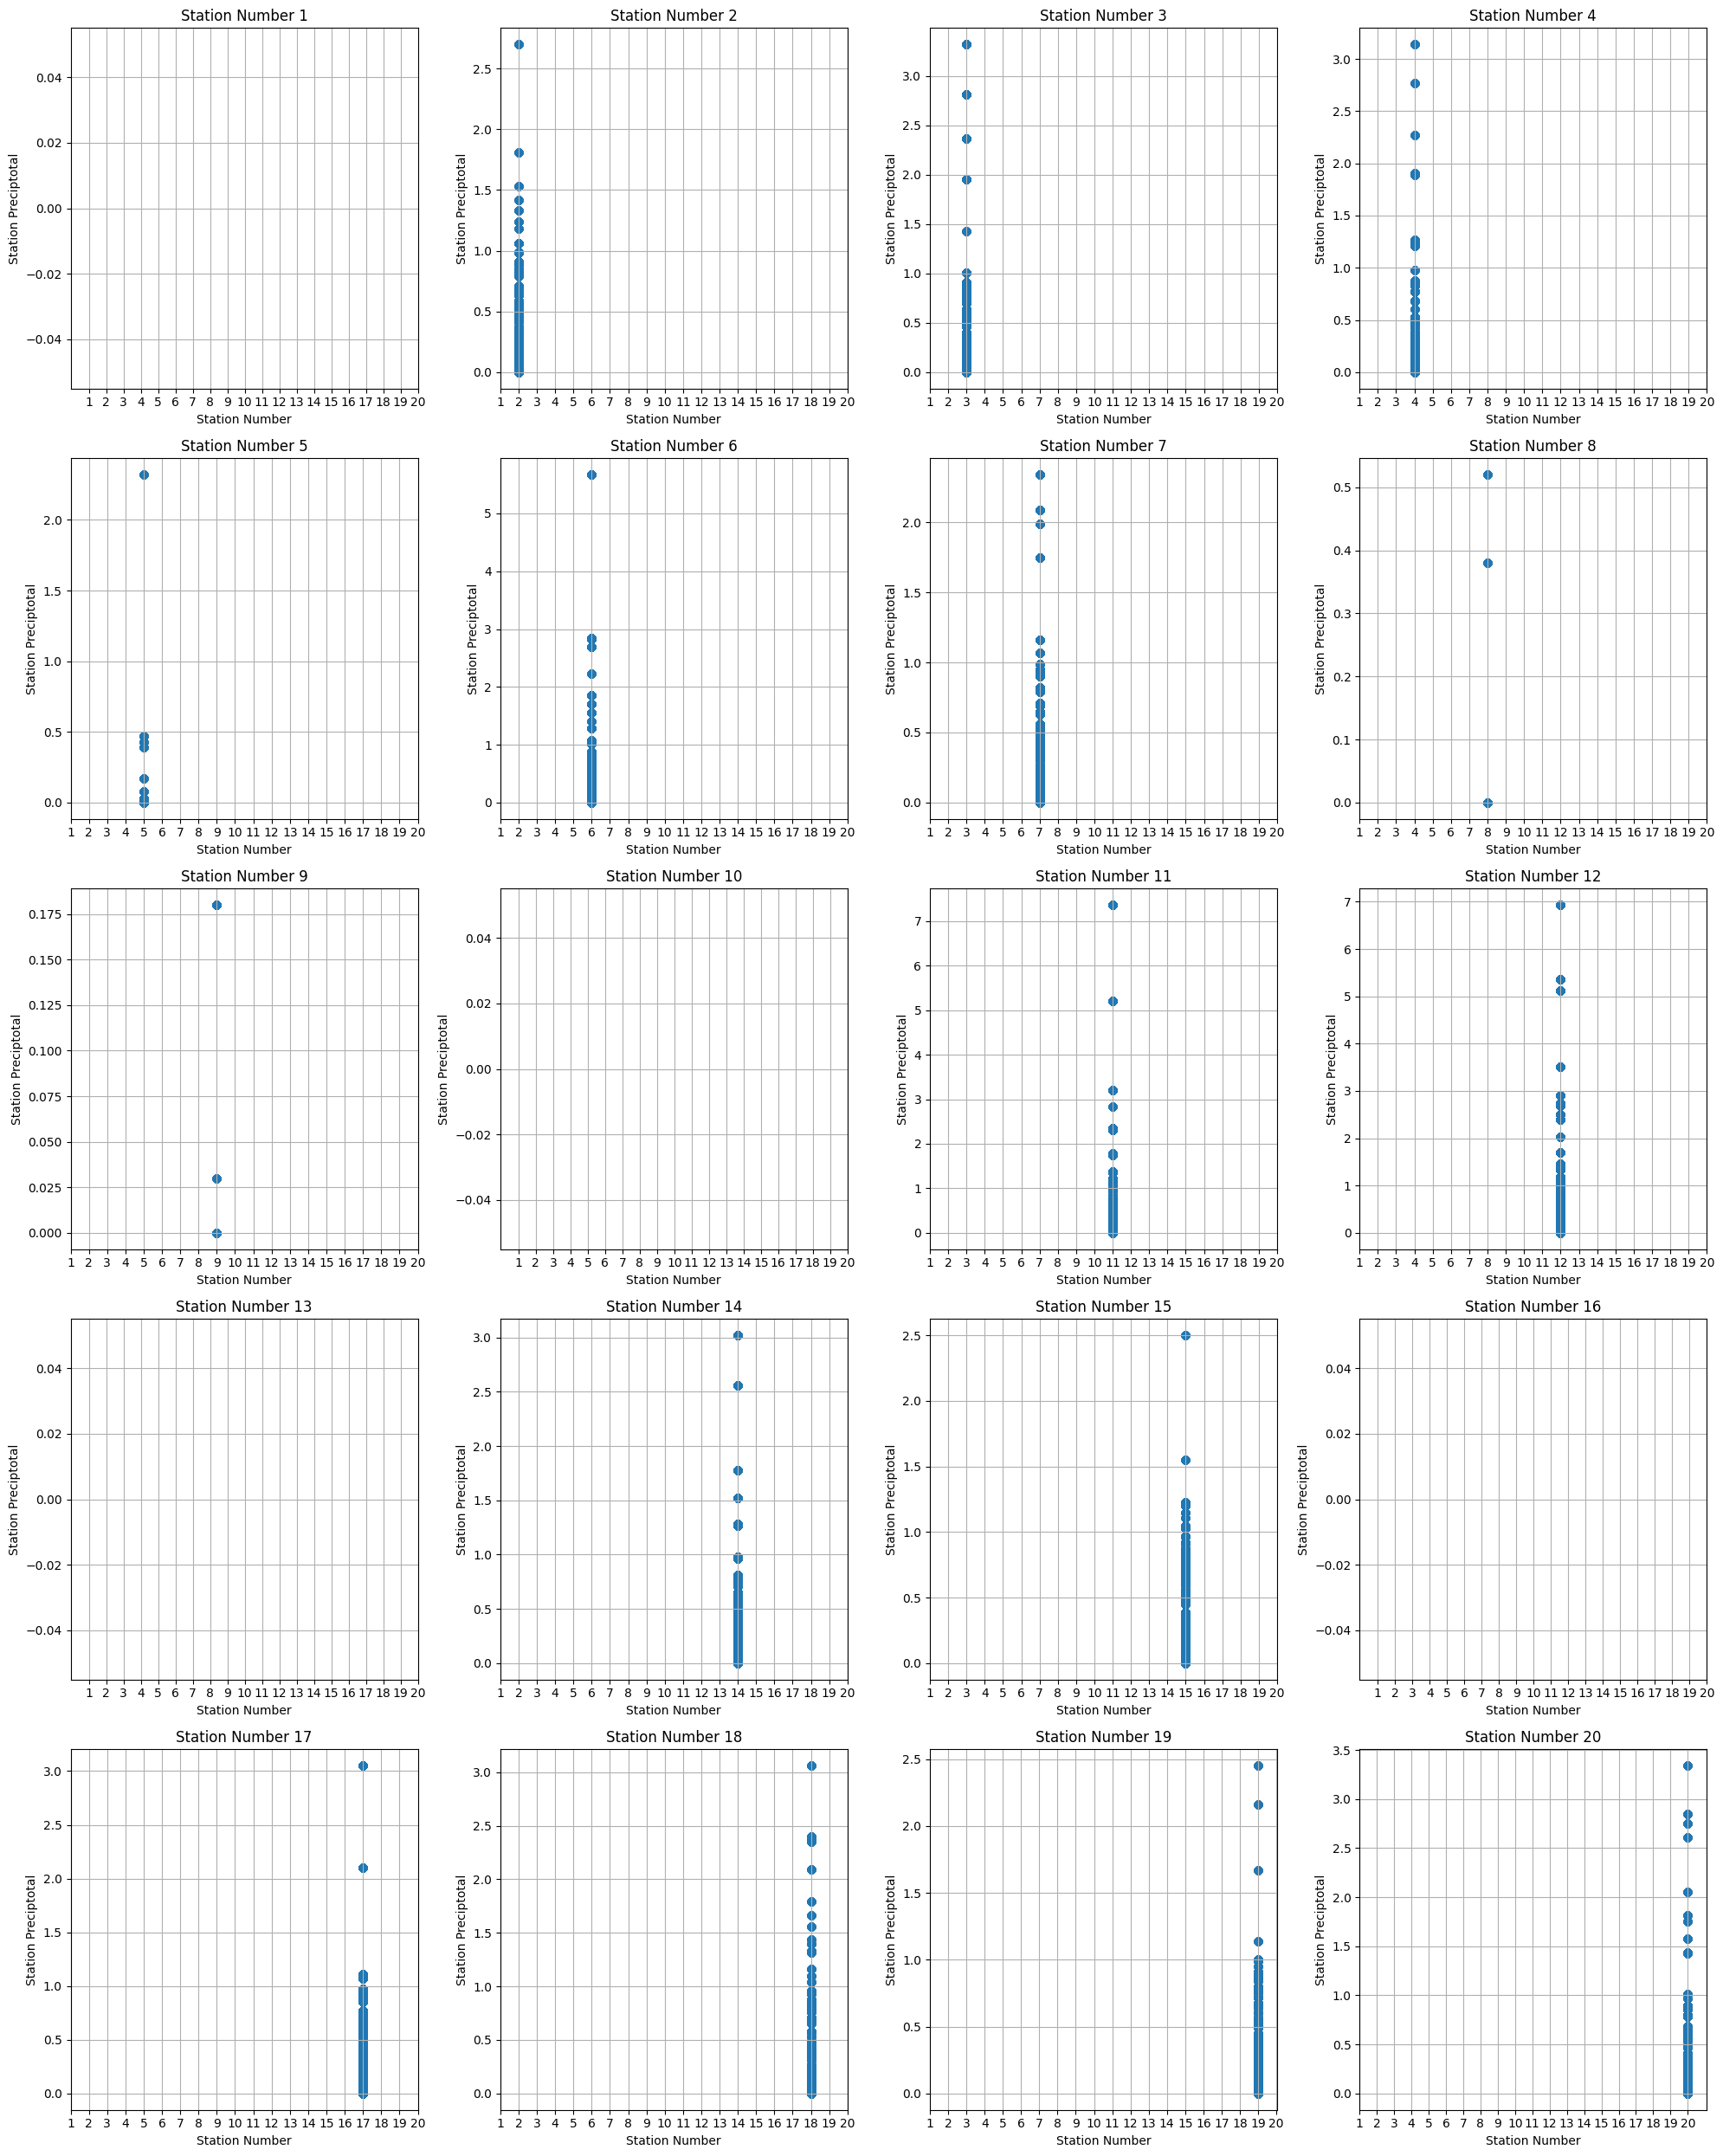

In [ ]:
# 1번부터 20번까지의 station_nbr에 대해 그래프 그리기
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
axs = axs.flatten()

for i in range(1, 21):
    station_data = dfc[dfc['station_nbr'] == i]
    axs[i-1].scatter(station_data['station_nbr'], station_data['preciptotal'], alpha=0.5)
    axs[i-1].set_title(f'Station Number {i}')
    axs[i-1].set_xlabel('Station Number')
    axs[i-1].set_ylabel('Station Preciptotal')
    axs[i-1].grid(True)
    axs[i-1].set_xticks(range(1, 21))  # x축에 1부터 20까지 표시

plt.tight_layout()
plt.show()

In [ ]:
# preciptotal의 결측치 개수 계산
num_missing = dfc['preciptotal'].isnull().sum()

# 전체 행 개수 계산
total_rows = len(dfc)

# 결측치 비율 계산
missing_ratio = num_missing / total_rows

# 결과 출력
print(f'preciptotal 결측치 비율: {missing_ratio:.4f}')

preciptotal 결측치 비율: 0.0983


9%정도 되는 것 같아서 지워도 크게 문제 없겠다고 판단함.

In [ ]:
# preciptotal의 결측치 제거
dfc = dfc.dropna(subset=['preciptotal'])

# 결과 출력
print(f'Original number of rows: {len(dfc)}')
print(f'Number of rows after dropna: {len(dfc)}')

Original number of rows: 2310132
Number of rows after dropna: 2310132


In [ ]:
dfc.isnull().sum()

date           0
store_nbr      0
item_nbr       0
units          0
station_nbr    0
tmax           0
tmin           0
tavg           0
dewpoint       0
wetbulb        0
heat           0
cool           0
snowfall       0
preciptotal    0
stnpressure    0
resultspeed    0
year           0
month          0
day            0
season         0
dtype: int64

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310132 entries, 103452 to 4530131
Data columns (total 20 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
 5   tmax         float64       
 6   tmin         float64       
 7   tavg         float64       
 8   dewpoint     float64       
 9   wetbulb      float64       
 10  heat         float64       
 11  cool         float64       
 12  snowfall     float64       
 13  preciptotal  float64       
 14  stnpressure  float64       
 15  resultspeed  float64       
 16  year         int32         
 17  month        int32         
 18  day          int32         
 19  season       object        
dtypes: datetime64[ns](1), float64(11), int32(3), int64(4), object(1)
memory usage: 343.7+ MB


In [ ]:
dfc.duplicated().sum()

0

##폭풍우 데이터 추출

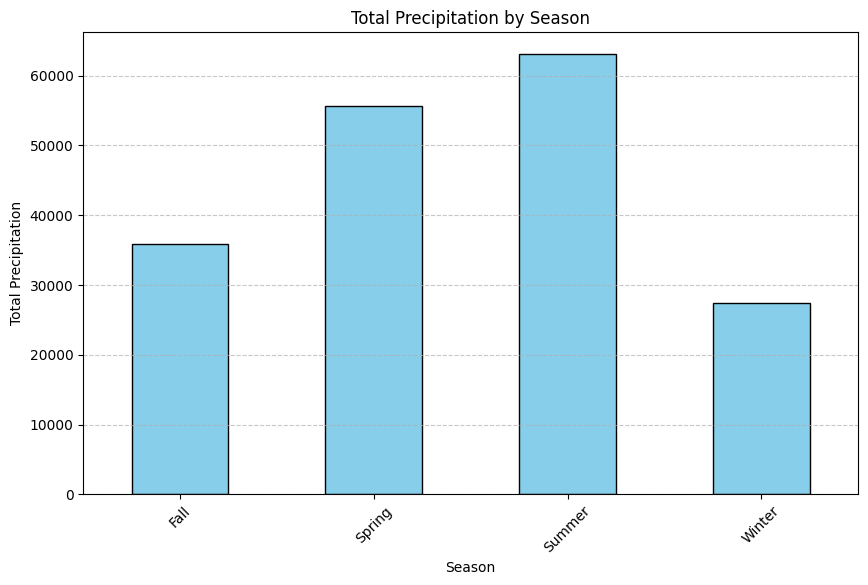

In [ ]:
# 계절별 총 preciptotal 계산
seasonal_preciptotal = dfc.groupby('season')['preciptotal'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))
seasonal_preciptotal.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Precipitation by Season')
plt.xlabel('Season')
plt.ylabel('Total Precipitation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
preciptotal_storm = dfc[dfc['preciptotal'] >= 1.0]
print(preciptotal_storm)

              date  store_nbr  item_nbr  units  station_nbr       tmax  \
105894  2012-01-24          2         1      0           14  18.333333   
105895  2012-01-24          2         2      0           14  18.333333   
105896  2012-01-24          2         3      0           14  18.333333   
105897  2012-01-24          2         4      0           14  18.333333   
105898  2012-01-24          2         5     63           14  18.333333   
...            ...        ...       ...    ...          ...        ...   
4480732 2013-03-23         44       107      0           12  21.666667   
4480733 2013-03-23         44       108      0           12  21.666667   
4480734 2013-03-23         44       109      0           12  21.666667   
4480735 2013-03-23         44       110      0           12  21.666667   
4480736 2013-03-23         44       111      0           12  21.666667   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
105894    1.111111  10.000000      32

In [ ]:
snowfall_storm = dfc[dfc['snowfall'] >= 2.0]
print(snowfall_storm)

              date  store_nbr  item_nbr  units  station_nbr      tmax  \
552780  2013-02-12          6         1      0           14  5.555556   
552781  2013-02-12          6         2      0           14  5.555556   
552782  2013-02-12          6         3      0           14  5.555556   
552783  2013-02-12          6         4      0           14  5.555556   
552784  2013-02-12          6         5      0           14  5.555556   
...            ...        ...       ...    ...          ...       ...   
4277269 2013-02-12         42       107      0           14  5.555556   
4277270 2013-02-12         42       108      0           14  5.555556   
4277271 2013-02-12         42       109      0           14  5.555556   
4277272 2013-02-12         42       110      0           14  5.555556   
4277273 2013-02-12         42       111      0           14  5.555556   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
552780   0.555556  3.333333      30.0     34.0  27.

In [ ]:
# 조건 설정
condition_preciptotal = (dfc['preciptotal'] >= 1.0)
condition_snowfall = dfc['snowfall'] >= 2.0

# 두 조건 중 하나라도 만족하는 행을 필터링
fdf = dfc[condition_preciptotal | condition_snowfall]

# 결과 확인
print(fdf)

              date  store_nbr  item_nbr  units  station_nbr       tmax  \
105894  2012-01-24          2         1      0           14  18.333333   
105895  2012-01-24          2         2      0           14  18.333333   
105896  2012-01-24          2         3      0           14  18.333333   
105897  2012-01-24          2         4      0           14  18.333333   
105898  2012-01-24          2         5     63           14  18.333333   
...            ...        ...       ...    ...          ...        ...   
4480732 2013-03-23         44       107      0           12  21.666667   
4480733 2013-03-23         44       108      0           12  21.666667   
4480734 2013-03-23         44       109      0           12  21.666667   
4480735 2013-03-23         44       110      0           12  21.666667   
4480736 2013-03-23         44       111      0           12  21.666667   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
105894    1.111111  10.000000      32

폭풍우로 정의한 데이터들을 따로 빼서 fdf로 정의함. 여기서 판매량과 연관지어 봐야할 듯.

In [ ]:
# dfc에서 fdf를 뺀 나머지 데이터 추출
dff = dfc.merge(fdf, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

print(dff)

              date  store_nbr  item_nbr  units  station_nbr       tmax  \
0       2012-01-02          2         1      0           14   7.222222   
1       2012-01-02          2         2      0           14   7.222222   
2       2012-01-02          2         3      0           14   7.222222   
3       2012-01-02          2         4      0           14   7.222222   
4       2012-01-02          2         5    147           14   7.222222   
...            ...        ...       ...    ...          ...        ...   
2310127 2014-10-31         44       107      0           12  23.888889   
2310128 2014-10-31         44       108      0           12  23.888889   
2310129 2014-10-31         44       109      0           12  23.888889   
2310130 2014-10-31         44       110      0           12  23.888889   
2310131 2014-10-31         44       111      0           12  23.888889   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0        -3.333333   2.222222      16

원래 데이터 프레임에서 폭풍우로 정의한 데이터들을 제외한 나머지 평범한 날씨들을 dff로 정의함. 폭풍우 시에 판매량과 평소의 판매량을 비교하기 위해 임시로 만든 프레임이라 생각해주면 될 것 같다.

#폭풍 시 판매량 확인

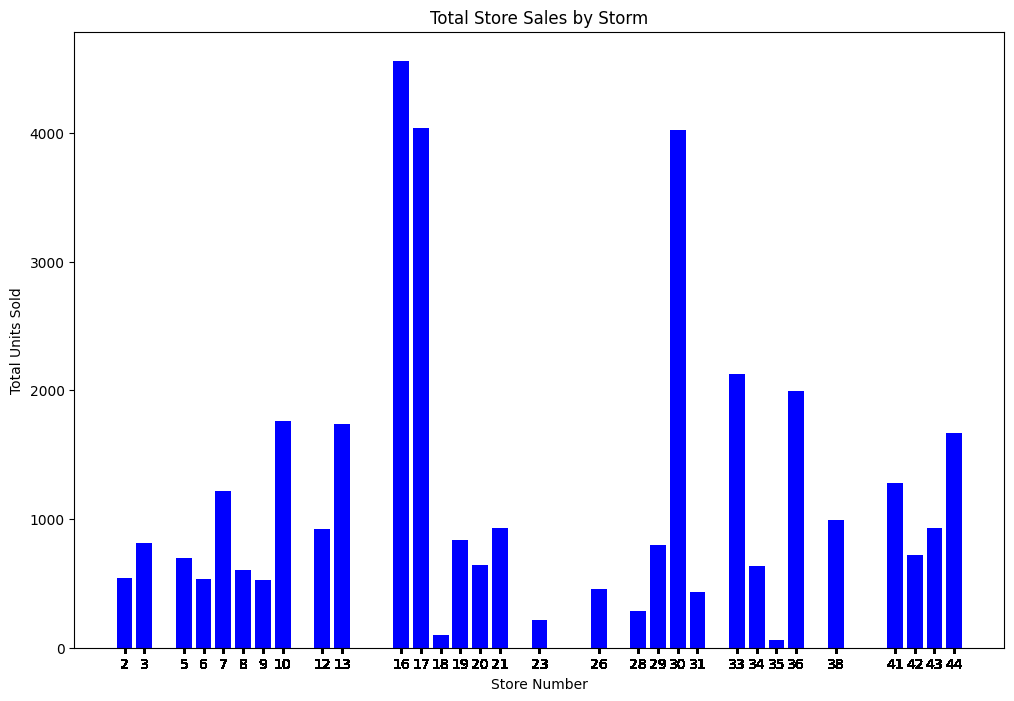

In [ ]:
# store_nbr별로 units의 총합 계산
store_sales = fdf.groupby('store_nbr')['units'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
plt.bar(store_sales['store_nbr'], store_sales['units'], color='blue')
plt.xlabel('Store Number')
plt.ylabel('Total Units Sold')
plt.title('Total Store Sales by Storm')

# X축 눈금을 모든 item_nbr에 맞추어 표시
plt.xticks(fdf['store_nbr'])
plt.show()

폭풍우가 왔을 때 판매량이 높은 매장을 3순위까지 매겨보면 16, 30, 17매장 순으로 판매량이 많이 나왔다. 이게 비가 많이 온 날에 이런건지 눈 이 많이 온 날에 이랬는지 구분선이 필요함.

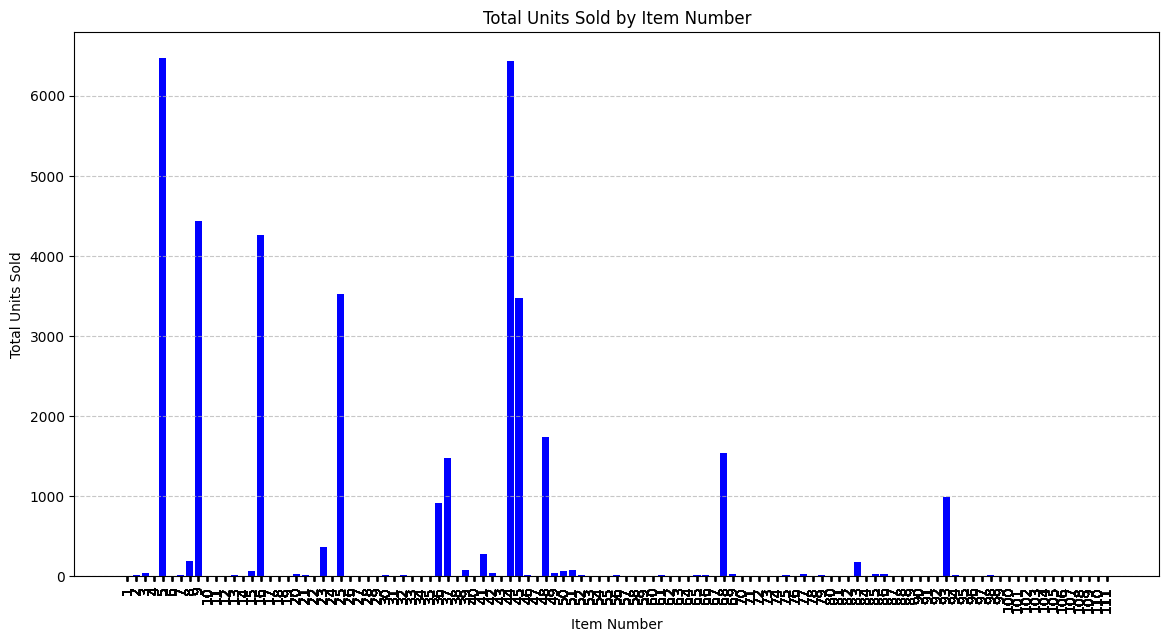

In [ ]:
# item_nbr별로 units의 총합 계산
item_sales = fdf.groupby('item_nbr')['units'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
plt.bar(item_sales['item_nbr'], item_sales['units'], color='blue')

plt.xlabel('Item Number')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Item Number')

# X축 눈금 레이블 회전 및 서브샘플링
plt.xticks(
    ticks=fdf['item_nbr'][::10],  # 예를 들어, 10개 단위로 레이블 표시
    labels=fdf['item_nbr'][::10],
    rotation=90  # 90도 회전
)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y축에만 그리드 추가
# 여백 조정
plt.subplots_adjust(bottom=0.2)  # X축 레이블이 잘 보이도록 여백 조정

plt.show()

가장 많이 판매된 물품을 5순위로 뽑았을 때 44, 5 ,25, 16, 9번 물품이 가장 많이 판매가 된 것으로 보인다. 다음으로 판매량이 많았던 16, 30, 17 매장에서 집중적으로 판매된 물품을 조회해보려 한다.

### 16번 매장

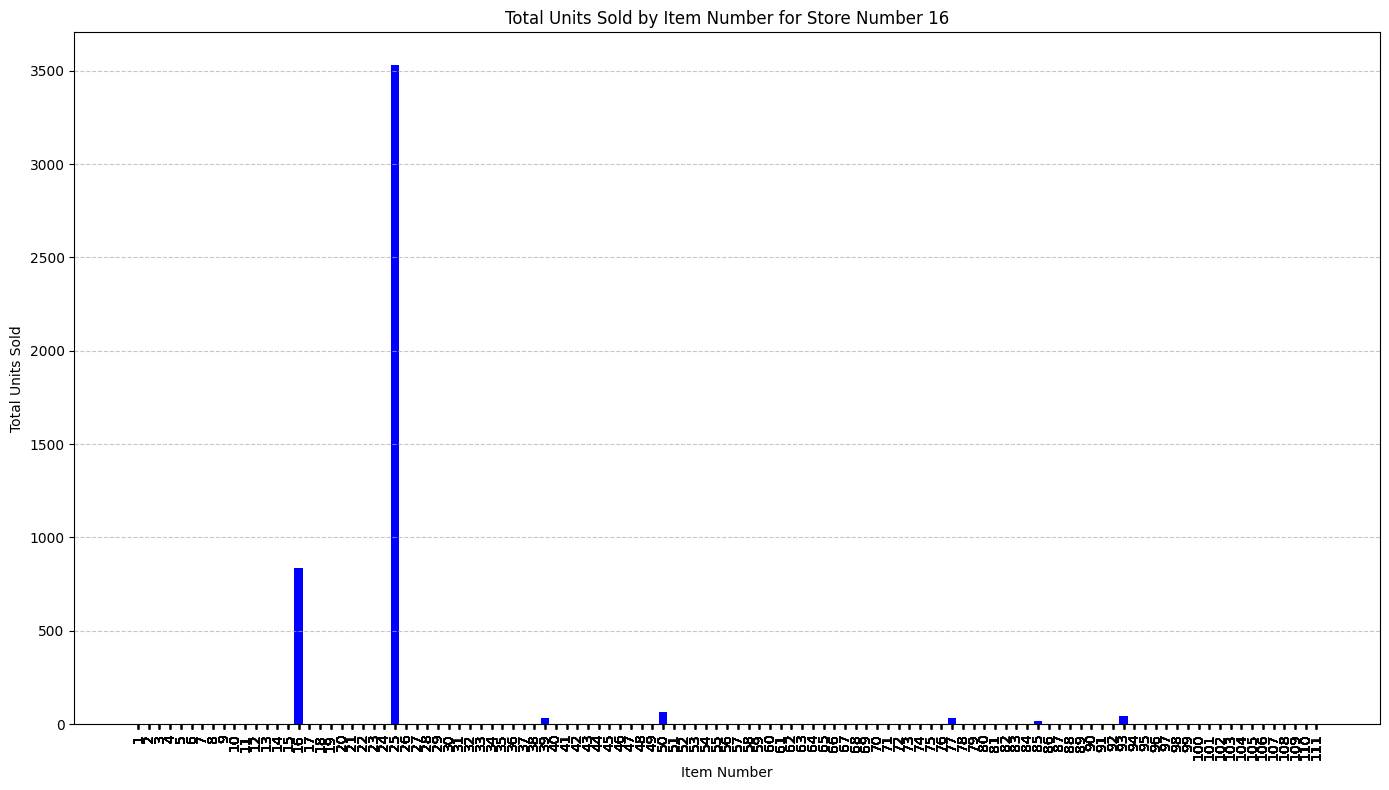

In [ ]:
# store_nbr이 16인 행 필터링
fdf_store_16 = fdf[fdf['store_nbr'] == 16]

# item_nbr별로 units의 총합 계산
item_sales_store_16 = fdf_store_16.groupby('item_nbr')['units'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
plt.bar(item_sales_store_16['item_nbr'], item_sales_store_16['units'], color='blue')

plt.xlabel('Item Number')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Item Number for Store Number 16')

# X축 눈금 레이블 모두 표시 및 조정
plt.xticks(
    ticks=fdf_store_16['item_nbr'],  # 모든 item_nbr 표시
    rotation=90,  # 레이블을 90도 회전
    ha='center'  # 중앙 정렬
)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y축에만 그리드 추가
plt.tight_layout()  # 레이아웃 조정

plt.show()

25번 품목이 누적 3000개 이상으로 가장 많이 팔렸음. 하지만 1000개 가까이 누적으로 팔린 16번 품목도 살펴볼 필요가 있음.

In [ ]:
# store_nbr이 16이고 item_nbr이 25인 행 필터링
fdf_store_16_item_25 = fdf[(fdf['store_nbr'] == 16) & (fdf['item_nbr'] == 25)]

# units의 최소값, 최대값, 평균값 계산
min_units_row = fdf_store_16_item_25[fdf_store_16_item_25['units'] == fdf_store_16_item_25['units'].min()]
max_units_row = fdf_store_16_item_25[fdf_store_16_item_25['units'] == fdf_store_16_item_25['units'].max()]
average_units = fdf_store_16_item_25['units'].mean()

# 결과 출력
print("Minimum Units Row:")
print(min_units_row)
print("\nMaximum Units Row:")
print(max_units_row)
# store_nbr이 16이고 item_nbr이 25인 행 필터링
fdf_store_16_item_25 = fdf[(fdf['store_nbr'] == 16) & (fdf['item_nbr'] == 25)]
print(f"\nAverage Units: {average_units:.2f}")

Minimum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  \
1572450 2012-10-29         16        25      3            2  16.111111   

             tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1572450  8.888889  12.777778      54.0     54.0  10.0   0.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day season  
1572450         1.53        28.35         18.8  2012     10   29   Fall  

Maximum Units Row:
              date  store_nbr  item_nbr  units  station_nbr      tmax  \
1585326 2013-02-23         16        25    270            2  0.555556   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1585326 -2.222222 -0.555556      26.0     30.0  34.0   0.0       2.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1585326         0.15        29.03          6.3  2013      2   23  Winter  

Average Units: 147.04


16번 매장에서 25번 품목의 판매량이 최소였을 때는 비가 왔던 날이고 최대로 팔렸을 때는 눈이 많이 내렸던 날이었음. 그럼 이 품목은 습기가 많은 날 보다 춥고 눈 오는 때에 잘 팔리는 물품일 수도 있다는 생각이 듦.

In [ ]:
# store_nbr이 16이고 item_nbr이 16인 행 필터링
fdf_store_16_item_16 = fdf[(fdf['store_nbr'] == 16) & (fdf['item_nbr'] == 16)]

# units의 최소값, 최대값, 평균값 계산
min_units_row = fdf_store_16_item_16[fdf_store_16_item_16['units'] == fdf_store_16_item_16['units'].min()]
max_units_row = fdf_store_16_item_16[fdf_store_16_item_16['units'] == fdf_store_16_item_16['units'].max()]
average_units = fdf_store_16_item_16['units'].mean()

# 결과 출력
print("Minimum Units Row:")
print(min_units_row)
print("\nMaximum Units Row:")
print(max_units_row)
# store_nbr이 16이고 item_nbr이 16인 행 필터링
fdf_store_16_item_16 = fdf[(fdf['store_nbr'] == 16) & (fdf['item_nbr'] == 16)]
print(f"\nAverage Units: {average_units:.2f}")

Minimum Units Row:
              date  store_nbr  item_nbr  units  station_nbr      tmax  \
1587981 2013-03-19         16        16     11            2 -0.555556   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1587981 -3.888889 -2.222222      28.0     20.0  37.0   0.0       7.7   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1587981         1.18        28.74          9.3  2013      3   19  Spring  

Maximum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  tmin  \
1555569 2012-06-02         16        16     73            2  16.666667  10.0   

              tavg  dewpoint  wetbulb  heat  cool  snowfall  preciptotal  \
1555569  13.333333      55.0     55.0   9.0   0.0       0.0         1.81   

         stnpressure  resultspeed  year  month  day  season  
1555569        28.72          4.4  2012      6    2  Summer  

Average Units: 34.88


16번 매장에서 16번 물품의 판매량이 최소일 때는 강설이 7.7인치였던 날이고 cm로 바꾸면 약 19.6cm라서 눈 폭풍이 왔던 날. 누적으로는 어느정도 팔린 물품이라고 생각했지만 막상 조회를 해보니 최소 판매량과 최고 판매량의 차이가 얼마 나지 않음. 폭풍우가 없던 평소에도 이 정도 팔렸는지 확인이 필요함.

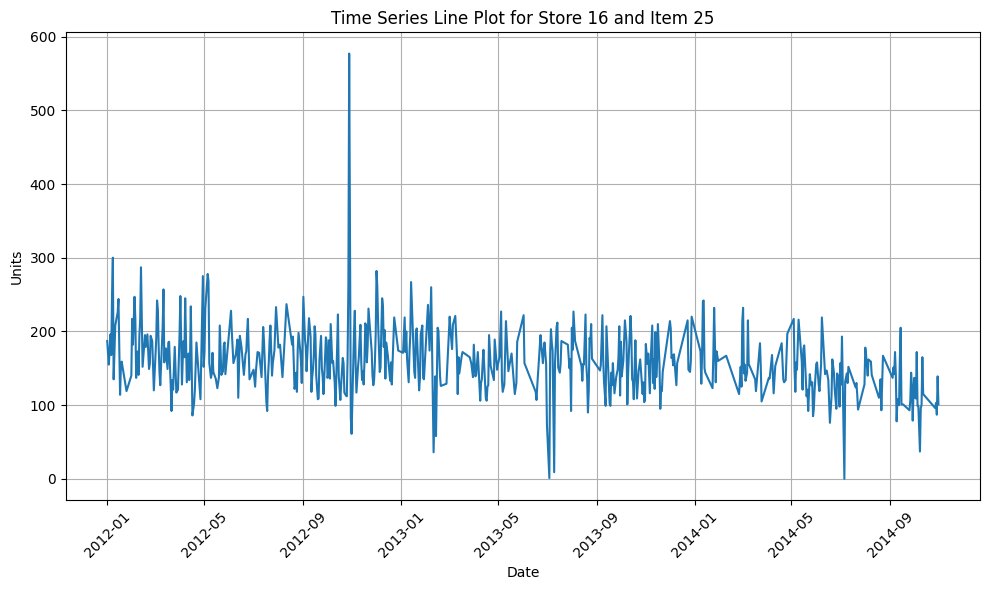

In [ ]:
# 특정 store_nbr 값과 item_nbr 값 입력
specific_store_nbr = 16
specific_item_nbr = 25

# store_nbr이 특정 값이고 item_nbr이 특정 값인 데이터 필터링
filtered_data = dff[(dff['store_nbr'] == specific_store_nbr) & (dff['item_nbr'] == specific_item_nbr)]

# 날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='units', data=filtered_data)
plt.title(f"Time Series Line Plot for Store {specific_store_nbr} and Item {specific_item_nbr}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

16번 매장의 25번 품목의 평소 판매량을 조회해보니 특정 이벤트가 있는 것이 아니라면 100에서 200 사이를 넘나들 듯이 팔린, 즉 고객들이 주로 잘 사가는 물품이 아닌가 싶음. 대신에 비보다 눈 오는 날에 더 많이 팔릴 수도 있는 가능성도 열어놔야함. 여기 그래프에서도 자세히 보면 여름 시기에는 조금 내려갔다가 겨울이 되면 미세하게 올라가는 형태를 볼 수 있음. 폭풍우가 왔을 때의 누적 판매량 평균이 145 정도였으니 이 후로도 폭풍우가 와도 기본 100 이상에 많으면 150, 눈 오는 겨울에는 200개 가까이 팔릴 것 같음.

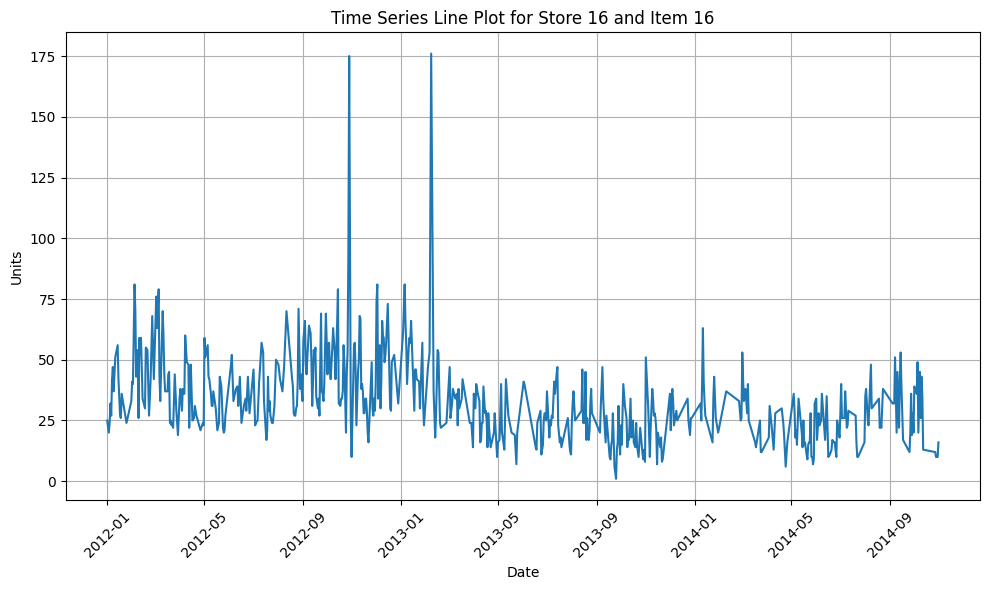

In [ ]:
# 특정 store_nbr 값과 item_nbr 값 입력
specific_store_nbr = 16
specific_item_nbr = 16

# store_nbr이 특정 값이고 item_nbr이 특정 값인 데이터 필터링
filtered_data = dff[(dff['store_nbr'] == specific_store_nbr) & (dff['item_nbr'] == specific_item_nbr)]

# 날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='units', data=filtered_data)
plt.title(f"Time Series Line Plot for Store {specific_store_nbr} and Item {specific_item_nbr}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

16번 매장의 16번 품목은 평소에도 판매량이 25개에서 50개 사이 혹은 약 15개에서 40개 사이 정도로 저조했던 편. 그래도 0으로 떨어진 적은 한번 말고 거의 없었던 것으로 보임. 폭풍우 시 평균이 34개가 나왔었으니 이 후 폭풍우 시에 16번 품목은 약 30개 정도 팔릴 것으로 예상함.

### 17번 매장

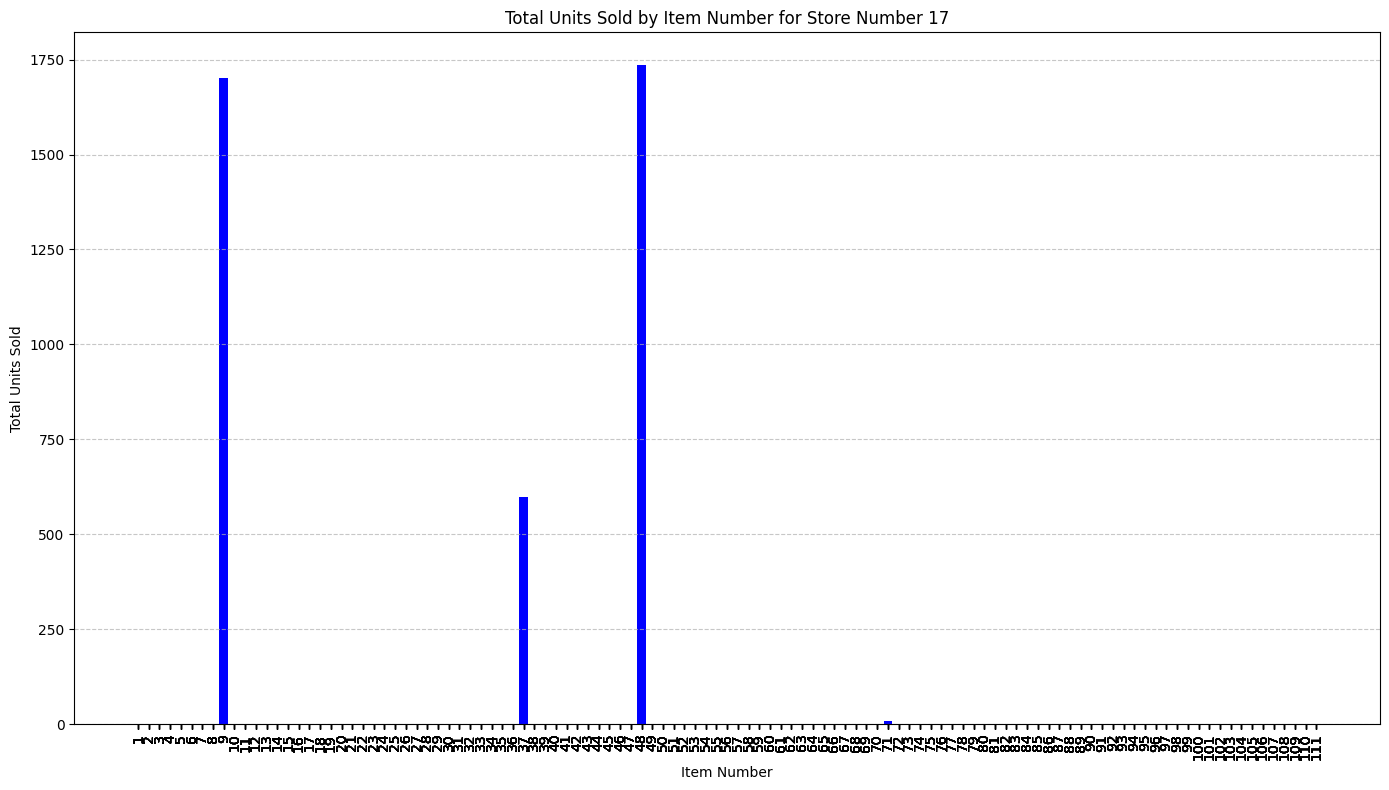

In [ ]:
# store_nbr이 30인 행 필터링
fdf_store_17 = fdf[fdf['store_nbr'] == 17]

# item_nbr별로 units의 총합 계산
item_sales_store_17 = fdf_store_17.groupby('item_nbr')['units'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
plt.bar(item_sales_store_17['item_nbr'], item_sales_store_17['units'], color='blue')

plt.xlabel('Item Number')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Item Number for Store Number 17')

# X축 눈금 레이블 모두 표시 및 조정
plt.xticks(
    ticks=fdf_store_17['item_nbr'],  # 모든 item_nbr 표시
    rotation=90,  # 레이블을 90도 회전
    ha='center'  # 중앙 정렬
)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y축에만 그리드 추가
plt.tight_layout()  # 레이아웃 조정

plt.show()

17번 매장에서 9번 품목이 가장 많이 판매되었고, 비슷하게 48번 품목도 많이 나간 것 같음. 판매 수가 일정한 단체 주문일 수도 있으니 자세히 살펴볼 필요가 있음.

In [ ]:
# store_nbr이 17이고 item_nbr이 9인 행 필터링
fdf_store_17_item_9 = fdf[(fdf['store_nbr'] == 17) & (fdf['item_nbr'] == 9)]

# units의 최소값, 최대값, 평균값 계산
min_units_row = fdf_store_17_item_9[fdf_store_17_item_9['units'] == fdf_store_17_item_9['units'].min()]
max_units_row = fdf_store_17_item_9[fdf_store_17_item_9['units'] == fdf_store_17_item_9['units'].max()]
average_units = fdf_store_17_item_9['units'].mean()

# 결과 출력
print("Minimum Units Row:")
print(min_units_row)
print("\nMaximum Units Row:")
print(max_units_row)
# store_nbr이 17이고 item_nbr이 9인 행 필터링
fdf_store_17_item_9 = fdf[(fdf['store_nbr'] == 17) & (fdf['item_nbr'] == 9)]
print(f"\nAverage Units: {average_units:.2f}")

Minimum Units Row:
              date  store_nbr  item_nbr  units  station_nbr      tmax  \
1675886 2013-01-08         17         9      1           20  8.888889   

             tmin      tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1675886  6.666667  7.777778      41.0     44.0  19.0   0.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1675886         1.43        29.31          5.1  2013      1    8  Winter  

Maximum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  \
1651910 2012-06-06         17         9    345           20  36.111111   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1651910  20.555556  28.333333      68.0     72.0   0.0  18.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1651910         1.44        29.12          6.8  2012      6    6  Summer  

Average Units: 154.73


In [ ]:
# store_nbr이 17이고 item_nbr이 48인 행 필터링
fdf_store_17_item_48 = fdf[(fdf['store_nbr'] == 17) & (fdf['item_nbr'] == 48)]

# units의 최소값, 최대값, 평균값 계산
min_units_row = fdf_store_17_item_48[fdf_store_17_item_48['units'] == fdf_store_17_item_48['units'].min()]
max_units_row = fdf_store_17_item_48[fdf_store_17_item_48['units'] == fdf_store_17_item_48['units'].max()]
average_units = fdf_store_17_item_48['units'].mean()

# 결과 출력
print("Minimum Units Row:")
print(min_units_row)
print("\nMaximum Units Row:")
print(max_units_row)
# store_nbr이 17이고 item_nbr이 48인 행 필터링
fdf_store_17_item_48 = fdf[(fdf['store_nbr'] == 17) & (fdf['item_nbr'] == 48)]
print(f"\nAverage Units: {average_units:.2f}")

Minimum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  \
1636853 2012-01-24         17        48    110           20  20.555556   

             tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1636853  2.222222  11.666667      40.0     47.0  12.0   0.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1636853         1.75        29.23          9.7  2012      1   24  Winter  

Maximum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  \
1651949 2012-06-06         17        48    204           20  36.111111   

              tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
1651949  20.555556  28.333333      68.0     72.0   0.0  18.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
1651949         1.44        29.12          6.8  2012      6    6  Summer  

Average Units: 157.73


9번 품목의 경우 최저 판매량과 최대 판매량의 차이가 많이 큼, 둘 다 비가 많이 온 날이었고 평균 170개는 팔린다는 지표. 48번 품목의 경우 폭풍우 시 최저로 팔렸을 때 110개는 팔렸고 최대 판매량은 204개임. 둘 다 비가 많이 온 날이었고, 폭풍우 시 평균 155개는 팔린다는 지표임.

In [ ]:
# store_nbr이 17이고 item_nbr이 48인 행 필터링
dff_store_17_item_48 = dff[(dff['store_nbr'] == 17) & (dff['item_nbr'] == 48)]

average_units = dff_store_17_item_48['units'].mean()

# store_nbr이 17이고 item_nbr이 48인 행 필터링
dff_store_17_item_48 = dff[(dff['store_nbr'] == 17) & (dff['item_nbr'] == 48)]
print(f"\nAverage Units: {average_units:.2f}")

# store_nbr이 17이고 item_nbr이 9인 행 필터링
dff_store_17_item_9 = dff[(dff['store_nbr'] == 17) & (dff['item_nbr'] == 9)]

average_units = dff_store_17_item_9['units'].mean()

# store_nbr이 17이고 item_nbr이 9인 행 필터링
dff_store_17_item_9 = dff[(dff['store_nbr'] == 17) & (dff['item_nbr'] == 9)]
print(f"\nAverage Units: {average_units:.2f}")


Average Units: 76.10

Average Units: 144.21


폭풍우가 오지 않는 날에 각 품목의 판매량의 평균을 조회해보니 48번은 평균 76개, 9번은 평균 140개는 팔렸다는 지표.

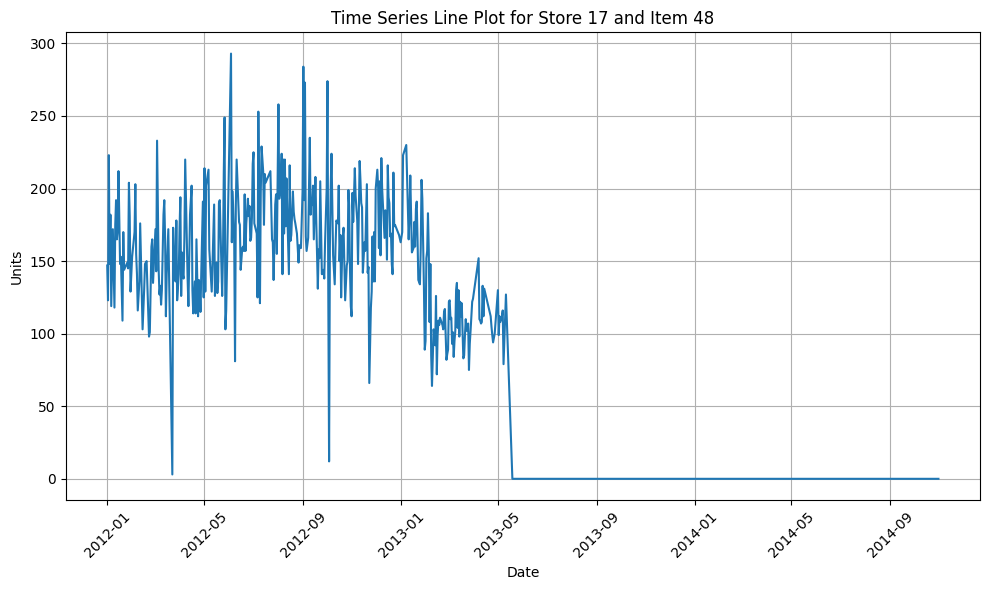

In [ ]:
# 특정 store_nbr 값과 item_nbr 값 입력
specific_store_nbr = 17
specific_item_nbr = 48

# store_nbr이 특정 값이고 item_nbr이 특정 값인 데이터 필터링
filtered_data = dff[(dff['store_nbr'] == specific_store_nbr) & (dff['item_nbr'] == specific_item_nbr)]

# 날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='units', data=filtered_data)
plt.title(f"Time Series Line Plot for Store {specific_store_nbr} and Item {specific_item_nbr}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

평소의 판매량을 봤었을 떄 2013년 상반기 끝나갈 때부터 안 팔렸다기보다는 판매된 정보가 기록이 안 된 것 같다.

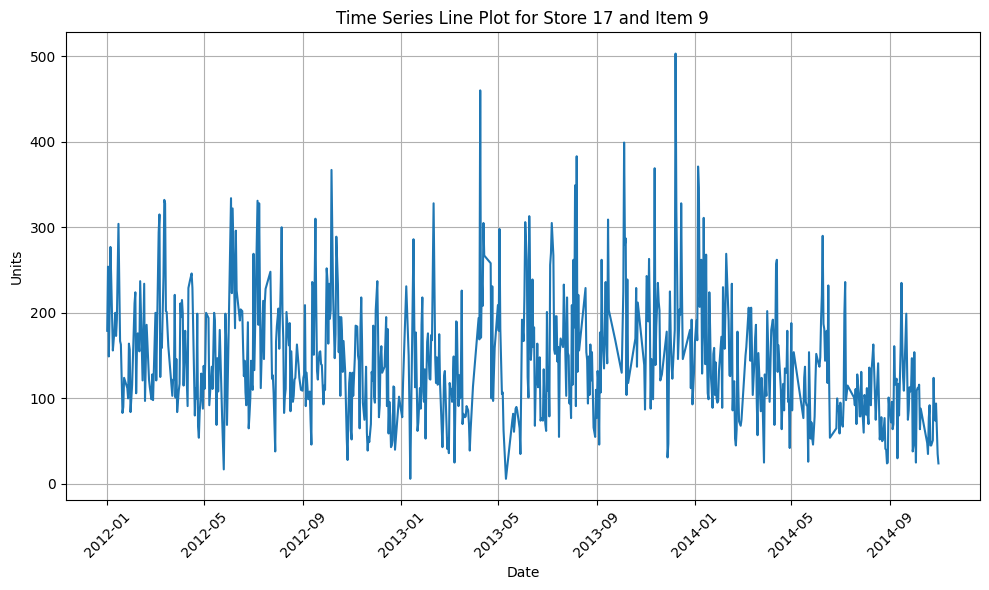

In [ ]:
# 특정 store_nbr 값과 item_nbr 값 입력
specific_store_nbr = 17
specific_item_nbr = 9

# store_nbr이 특정 값이고 item_nbr이 특정 값인 데이터 필터링
filtered_data = dff[(dff['store_nbr'] == specific_store_nbr) & (dff['item_nbr'] == specific_item_nbr)]

# 날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='units', data=filtered_data)
plt.title(f"Time Series Line Plot for Store {specific_store_nbr} and Item {specific_item_nbr}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

평소에도 9번 판매량이 아예 안 팔린 적은 없음. 거의 100에서 200 안은 웃도는 느낌. 심지어 최고기온이 36도인 매우 더운날에 300이상씩 판매되었으니, 정확하게 어떤 물품인지 추측은 안 되지만 식빵이나 우유처럼 잘 상하는 상품은 아닌 것 같다고 판단. 판매량이 항상 일정하지 않아서 단체 주문이나 그런건 아닌 것 같다. 결론적으로 17번 매장의 9번 품목은 기상 이변 시에도 150개 이상은 판매될 것 같다.

### 30번 매장

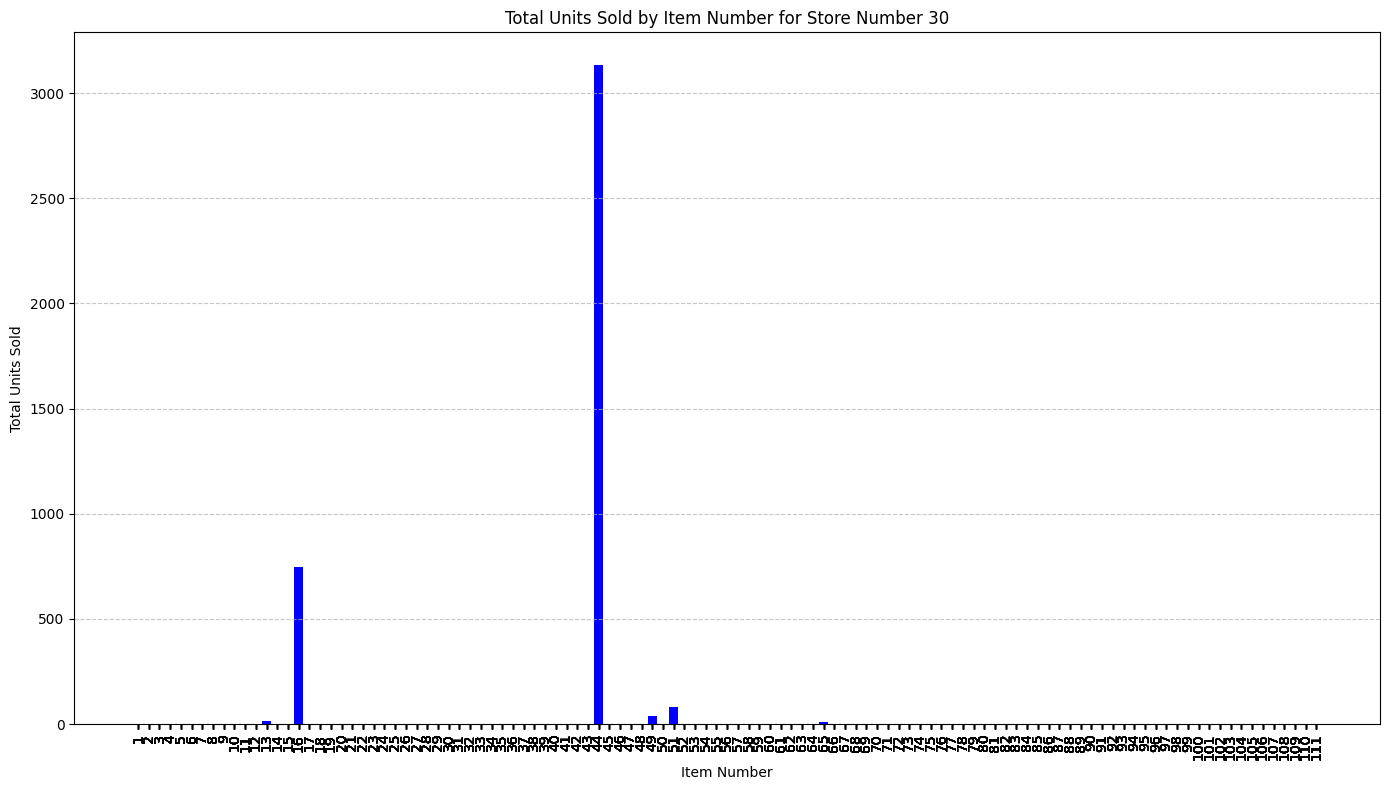

In [ ]:
# store_nbr이 30인 행 필터링
fdf_store_30 = fdf[fdf['store_nbr'] == 30]

# item_nbr별로 units의 총합 계산
item_sales_store_30 = fdf_store_30.groupby('item_nbr')['units'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
plt.bar(item_sales_store_30['item_nbr'], item_sales_store_30['units'], color='blue')

plt.xlabel('Item Number')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Item Number for Store Number 30')

# X축 눈금 레이블 모두 표시 및 조정
plt.xticks(
    ticks=fdf_store_30['item_nbr'],  # 모든 item_nbr 표시
    rotation=90,  # 레이블을 90도 회전
    ha='center'  # 중앙 정렬
)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y축에만 그리드 추가
plt.tight_layout()  # 레이아웃 조정

plt.show()

폭풍우나 눈폭풍이 온 날에 44번 품목이 압도적으로 많이 판매되었고, 가장 적게 팔린 양과 가장 많이 팔린 양과 평균적으로 팔린 양을 조회해봐야겠음.

In [ ]:
# store_nbr이 30이고 item_nbr이 44인 행 필터링
fdf_store_30_item_44 = fdf[(fdf['store_nbr'] == 30) & (fdf['item_nbr'] == 44)]

# units의 최소값, 최대값, 평균값 계산
min_units_row = fdf_store_30_item_44[fdf_store_30_item_44['units'] == fdf_store_30_item_44['units'].min()]
max_units_row = fdf_store_30_item_44[fdf_store_30_item_44['units'] == fdf_store_30_item_44['units'].max()]
average_units = fdf_store_30_item_44['units'].mean()

# 결과 출력
print("Minimum Units Row:")
print(min_units_row)
print("\nMaximum Units Row:")
print(max_units_row)
# store_nbr이 30이고 item_nbr이 44인 행 필터링
fdf_store_30_item_44 = fdf[(fdf['store_nbr'] == 30) & (fdf['item_nbr'] == 44)]
print(f"\nAverage Units: {average_units:.2f}")

Minimum Units Row:
              date  store_nbr  item_nbr  units  station_nbr  tmax      tmin  \
3023572 2013-02-22         30        44    102           19   0.0 -3.888889   

             tavg  dewpoint  wetbulb  heat  cool  snowfall  preciptotal  \
3023572 -1.666667      25.0     14.0  36.0   0.0       4.7         0.29   

         stnpressure  resultspeed  year  month  day  season  
3023572         29.1          6.7  2013      2   22  Winter  

Maximum Units Row:
              date  store_nbr  item_nbr  units  station_nbr       tmax  \
2991160 2012-05-06         30        44    395           19  16.111111   

             tmin       tavg  dewpoint  wetbulb  heat  cool  snowfall  \
2991160  7.777778  12.222222      48.0     49.0  11.0   0.0       0.0   

         preciptotal  stnpressure  resultspeed  year  month  day  season  
2991160         2.45        29.24          6.0  2012      5    6  Spring  

Average Units: 195.75


30번 매장에서 44번 품목이 최소로 팔렸을 때여도 100개는 넘고 이 날은 눈이 많이 온 날이었으며 최대로 팔렸을 때는 360개 넘었는데 이 날은 비가 많이 온 날이다. 폭풍우가 온 날 기준으로 평균을 내보아도 44번 품목은 180개 이상 팔려서 평소에는 얼마나 팔리는지 확인해 볼 필요가 있음.

In [ ]:
# store_nbr이 30이고 item_nbr이 44인 행 필터링
dff_store_30_item_44 = dff[(dff['store_nbr'] == 30) & (dff['item_nbr'] == 44)]

average_units = dff_store_30_item_44['units'].mean()

# store_nbr이 30이고 item_nbr이 44인 행 필터링
dff_store_30_item_44 = dff[(dff['store_nbr'] == 30) & (dff['item_nbr'] == 44)]
print(f"\nAverage Units: {average_units:.2f}")


Average Units: 157.67


평소에 30번 매장에서 44번 품목의 평균 판매량이 158은 찍음. 그럼 폭풍이 왔을 때 44번이 좀 더 잘 팔리는 물품일 수도 있음.(2014년 데이터가 부족해서 사실상 추측일 뿐, 아닐 가능성이 높음)

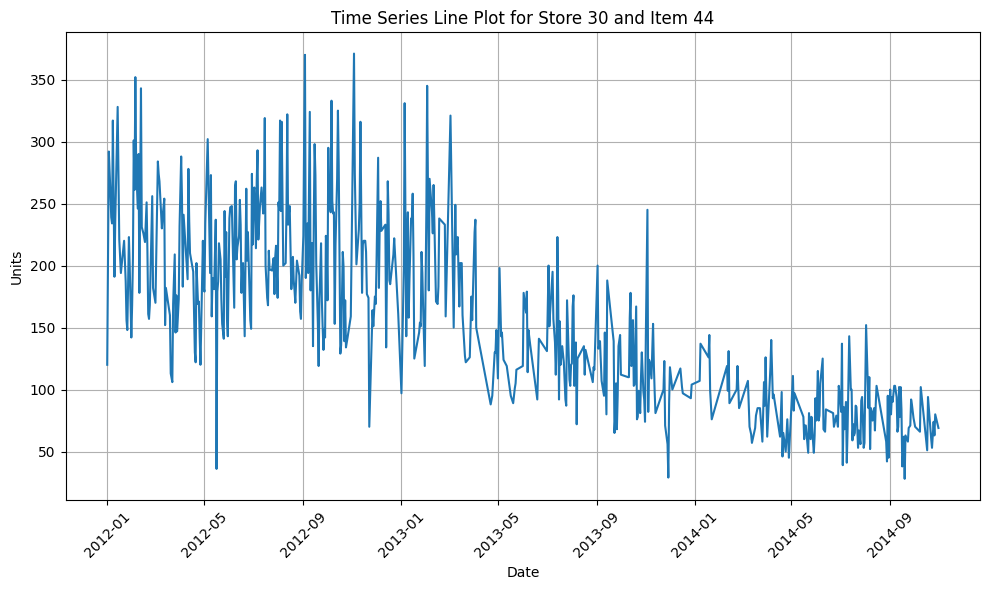

In [ ]:
# 특정 store_nbr 값과 item_nbr 값 입력
specific_store_nbr = 30
specific_item_nbr = 44

# store_nbr이 특정 값이고 item_nbr이 특정 값인 데이터 필터링
filtered_data = dff[(dff['store_nbr'] == specific_store_nbr) & (dff['item_nbr'] == specific_item_nbr)]

# 날짜에 대한 판매량에 따른 라인 플롯 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='units', data=filtered_data)
plt.title(f"Time Series Line Plot for Store {specific_store_nbr} and Item {specific_item_nbr}")
plt.xlabel("Date")
plt.ylabel("Units")
plt.grid(True)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

30번 매장의 44번 품목의 판매량은 시간이 지나면 지날 수록 하향하고 있지만 저조한 2014년을 뺀 나머지 2012년이랑 2013년을 살펴보니 일반적으로 하루에 100개 이상은 팔렸었다.

판매량이 일정하지는 않아서 단체 주문은  아닌 것 같으니, 30번 매장에서 44번 품목은 비가 와도 눈이 와도 (350개 이상은 일반적이진 않아도) 100에서 150개 이상은 팔릴 것 같다고 판단한다.

# 머신러닝

여러개의 모델로 진행을 할 것이고 만약 정확도가 저조하면 하이퍼 파라미터 튜닝을 해서 조정이 필요함

In [ ]:
# 날짜 및 시간 관련 특성 제거 (필요에 따라)
fdf = fdf.drop(columns=['date','season'])

In [ ]:
fdf

,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,resultspeed,year,month,day
105894,2,1,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105895,2,2,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105896,2,3,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105897,2,4,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105898,2,5,63,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480732,44,107,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480733,44,108,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480734,44,109,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480735,44,110,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23


In [ ]:
print(fdf.dtypes)
print(fdf.isna().sum())
print(fdf)

store_nbr        int64
item_nbr         int64
units            int64
station_nbr      int64
tmax           float64
tmin           float64
tavg           float64
dewpoint       float64
wetbulb        float64
heat           float64
cool           float64
snowfall       float64
preciptotal    float64
stnpressure    float64
resultspeed    float64
year             int32
month            int32
day              int32
dtype: object
store_nbr      0
item_nbr       0
units          0
station_nbr    0
tmax           0
tmin           0
tavg           0
dewpoint       0
wetbulb        0
heat           0
cool           0
snowfall       0
preciptotal    0
stnpressure    0
resultspeed    0
year           0
month          0
day            0
dtype: int64
         store_nbr  item_nbr  units  station_nbr       tmax       tmin  \
105894           2         1      0           14  18.333333   1.111111   
105895           2         2      0           14  18.333333   1.111111   
105896           2         3   

In [ ]:
fdf.columns

Index(['store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin', 'tavg',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal',
       'stnpressure', 'resultspeed', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
fdf

,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,resultspeed,year,month,day
105894,2,1,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105895,2,2,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105896,2,3,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105897,2,4,0,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
105898,2,5,63,14,18.333333,1.111111,10.000000,32.0,41.0,15.0,0.0,0.0,1.52,28.62,11.4,2012,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480732,44,107,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480733,44,108,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480734,44,109,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23
4480735,44,110,0,12,21.666667,13.333333,17.777778,58.0,60.0,1.0,0.0,0.0,2.03,29.87,1.5,2013,3,23


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 상수항 추가
fdf_with_const = add_constant(fdf)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = fdf_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(fdf_with_const.values, i) for i in range(fdf_with_const.shape[1])]

print(vif_data)

        feature           VIF
0         const  3.467711e+07
1     store_nbr  1.117198e+00
2      item_nbr  1.007272e+00
3         units  1.008772e+00
4   station_nbr  1.170174e+00
5          tmax  2.076723e+03
6          tmin  1.430563e+03
7          tavg  4.723183e+03
8      dewpoint  5.654814e+01
9       wetbulb  6.060907e+01
10         heat  1.310533e+02
11         cool  3.725103e+01
12     snowfall  2.791917e+00
13  preciptotal  1.524825e+00
14  stnpressure  1.723722e+00
15  resultspeed  1.346901e+00
16         year  1.526079e+00
17        month  1.655061e+00
18          day  1.103747e+00


In [ ]:
fdf = fdf.drop(columns=['tmax','tmin','tavg','dewpoint', 'wetbulb', 'heat','cool'])

In [ ]:
fdf

,store_nbr,item_nbr,units,station_nbr,snowfall,preciptotal,stnpressure,resultspeed,year,month,day
105894,2,1,0,14,0.0,1.52,28.62,11.4,2012,1,24
105895,2,2,0,14,0.0,1.52,28.62,11.4,2012,1,24
105896,2,3,0,14,0.0,1.52,28.62,11.4,2012,1,24
105897,2,4,0,14,0.0,1.52,28.62,11.4,2012,1,24
105898,2,5,63,14,0.0,1.52,28.62,11.4,2012,1,24
...,...,...,...,...,...,...,...,...,...,...,...
4480732,44,107,0,12,0.0,2.03,29.87,1.5,2013,3,23
4480733,44,108,0,12,0.0,2.03,29.87,1.5,2013,3,23
4480734,44,109,0,12,0.0,2.03,29.87,1.5,2013,3,23
4480735,44,110,0,12,0.0,2.03,29.87,1.5,2013,3,23


##1) Linear Regression

In [ ]:
# X느 입력 변수, 독립 변수, X 변수
X = fdf.drop(["units"], axis = 1).values
# y는 출력 변수, 목표 변수, 종속 변수
y = fdf[["units"]].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, #입출력 변수
                                                    test_size = 0.2, #테스트셋 사이즈
                                                    random_state=777) #random_state=시드 설정. 기본적으로 셈플링을 고려해서 테스트와 트레인셋을 8:2로 랜덤으로 나눔

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
print(f'R² 점수: {r2}')

2.1805960715656956
92.54709648573417
RMSE: 9.620140148965303
R² 점수: 0.006484843887373581


### (번외1) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Lasso Regression (L1 정규화)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Coefficients: {lasso.coef_}')
print(f'R² 점수: {r2}')

Lasso Regression MSE: 92.48834263528673
Lasso Coefficients: [ 0.0005743  -0.02973612  0.01528363 -0.00235052 -0.         -0.28891904
  0.02743351 -0.         -0.         -0.00975447]
R² 점수: 0.007115580486533379


### (번외2) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Ridge Regression (L2 정규화)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Coefficients: {ridge.coef_}')
print(f'R² 점수: {r2}')

Ridge Regression MSE: 92.54709267297869
Ridge Coefficients: [[ 0.00270258 -0.02982766  0.02077472 -0.03117948 -0.07948575 -0.71690721
   0.02080457 -0.36167049 -0.01962221 -0.01626365]]
R² 점수: 0.006484884818213188


##2) Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')
print(f'R² 점수: {r2}')

0.5434344528710726
23.15489195171026
RMSE: 4.811953028834577
R² 점수: 0.7514267117421614


##3)Decision Tree Regressor

In [ ]:
from sklearn import tree
# 모델 인스턴스 생성
DT_reg_model = tree.DecisionTreeRegressor()

In [ ]:
#학습 수행
DT_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# test 데이터에 대한 예측값 생성(제출)
DT_reg_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#테스트 데이터 실제값(정답)
y_test.reshape(6461,)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#예측값 변수 생성
pred = DT_reg_model.predict(X_test)
# 실제값 변수 생성
true = y_test

#검증 지표에 값 입력 시 (실제값,예측값)
print(mean_absolute_error(true,pred))
print(mean_squared_error(true,pred))
rmse = mean_squared_error(true, pred, squared=False)
print(f"RMSE: {rmse}")
r2 = r2_score(true, pred)
print(f'R² 점수: {r2}')

0.5687973997833152
40.19300417891967
RMSE: 6.3397952789439245
R² 점수: 0.5685185128675511


## 4)XGBoost

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# XGBoost DMatrix 생성
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# XGBoost 파라미터 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제
    'learning_rate': 0.1,             # 학습률
    'max_depth': 5,                   # 트리 최대 깊이
    'alpha': 10                       # L1 정규화 항
}

# 모델 훈련
model = xgb.train(params, train_data, num_boost_round=100)

# 예측
predictions = model.predict(test_data)

# 성능 평가
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, predictions)
print(f'R² 점수: {r2}')

RMSE: 6.207573916510684
R² 점수: 0.5863285983309501


## 5)Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor 모델 생성
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
gbr.fit(X_train, y_train)

# 예측
y_pred = gbr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² 점수: {r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 60.852269332605864
R² 점수: 0.34673637357050047


R2-score 기준으로 Random Forest Regressor의 점수가 0.75로, 다른 모델들 중에 그나마 나은 것으로 판단되어 하이퍼 파라미터 튜닝으로 성능 개선을 진행하려 한다.

# 하이퍼 파라미터 튜닝

하나만 하기에는 부족할 것 같아서 튜닝의 대표적인 방법 두 가지인 그리드 서치와 랜덤 서치를 다 해보려 하는데 이전 교육 때 듣기로는 두 가지 다 실행하려면 랜덤 서치를 먼저 돌린 후 그리드 서치를 돌리라고 해서 랜덤 서치 먼저 돌려보려 한다.

##1) 랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# 하이퍼파라미터 후보 설정
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

# 모델과 랜덤 서치 객체 생성
model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=5)

# 데이터에 대해 랜덤 서치 수행
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f697918f850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f697918c2e0>})

In [ ]:
# 최적의 하이퍼파라미터
print(random_search.best_params_)

{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 175}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 최적의 하이퍼파라미터로 모델을 재설정
best_params = {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 175}
model = RandomForestRegressor(**best_params)

# 모델 학습
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=175)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 수행
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error: 23.8465
Mean Absolute Error: 0.5543
R^2 Score: 0.7440


## 2) 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# best_params = {'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 141}


# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 모델과 그리드 서치 객체 생성
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# 데이터에 대해 그리드 서치 수행
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# 최적의 하이퍼파라미터
print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# 최적의 하이퍼파라미터로 모델 재설정
best_params = {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}

model = RandomForestRegressor(**best_params)

# 모델 학습
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=30)

In [ ]:
# 예측 수행
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 22.8665
Mean Absolute Error: 0.5378
R^2 Score: 0.7545


하이퍼 파라미터 튜닝의 성능 비교를 위해 두 가지의 방법을 다 실행해 봤을 때 R2-score 기준으로 미세하게 그리드 서치가 성능이 더 좋게 나온 것 같다.